# **Introduction**
## **A Data Science Approach to Predict the Best Candidates to Be Targeted for a Marketing Campaign**

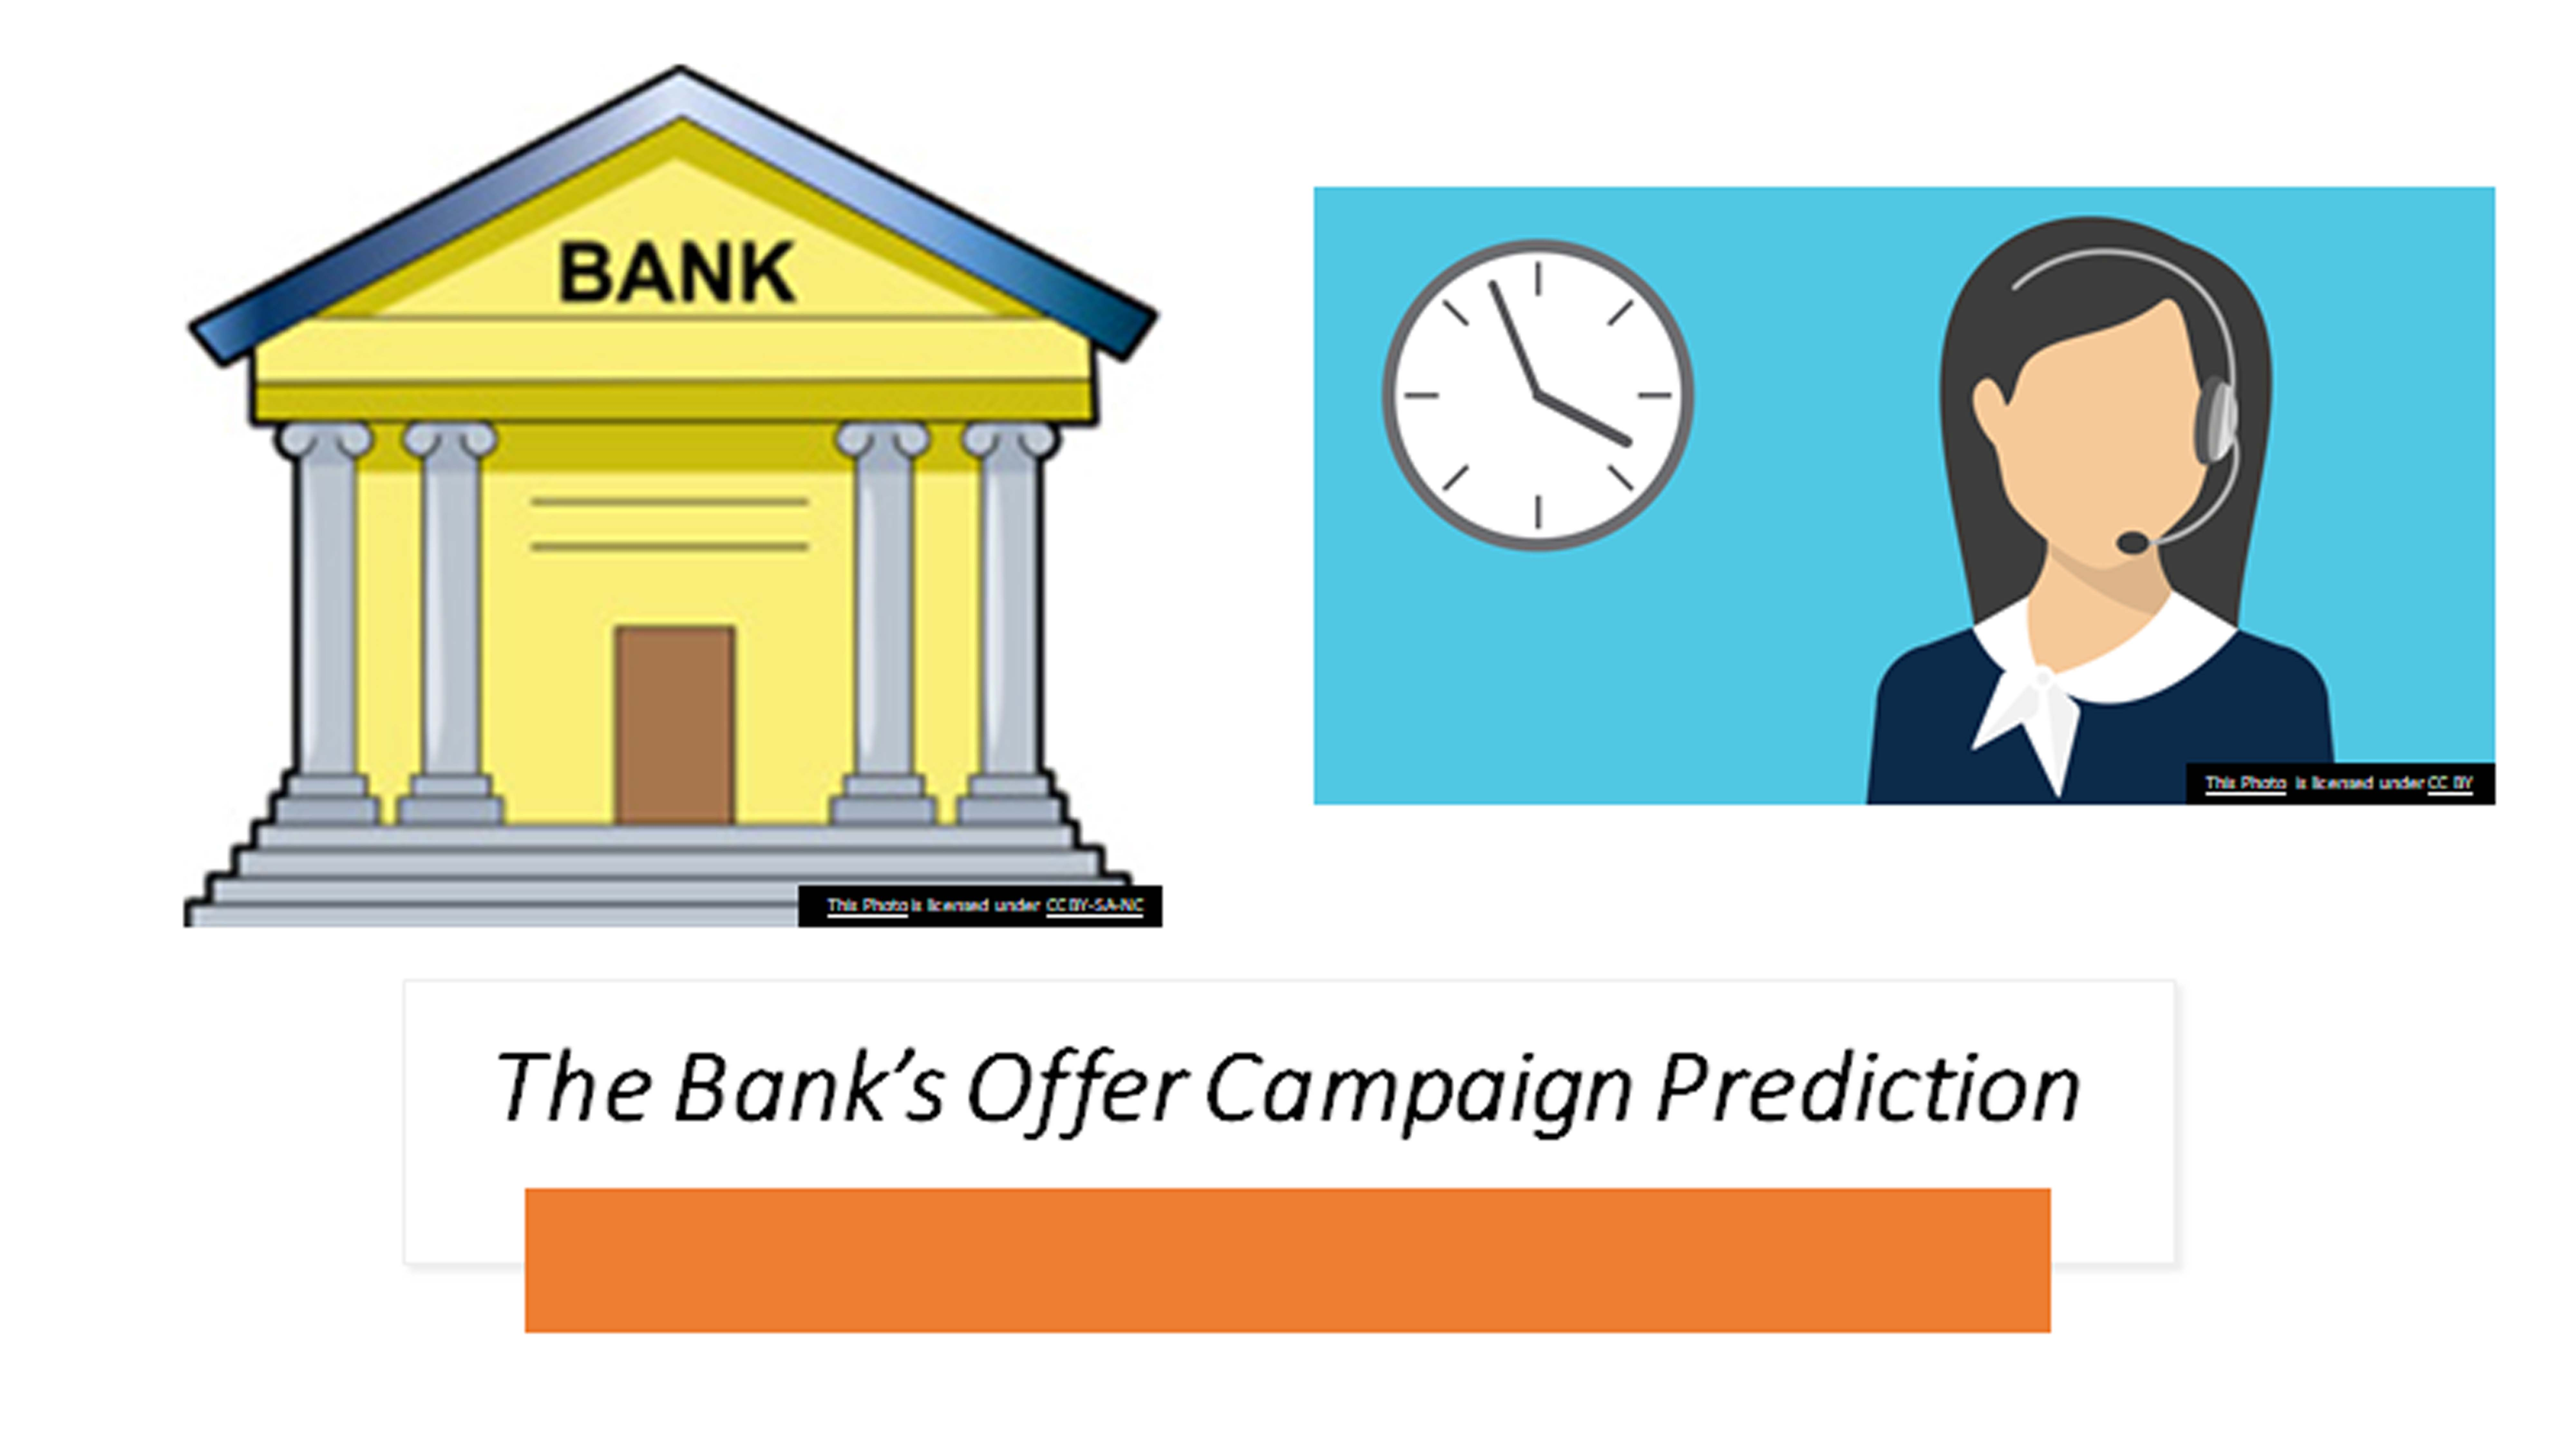

## **About the Project**

### **Link for Presentation**
https://www.canva.com/design/DAFRYFrl5Pg/e7T8DLgE7iFF4cTgn2iagA/view?utm_content=DAFRYFrl5Pg&utm_campaign=designshare&utm_medium=link&utm_source=publishsharelink

#### This Machine Learning project is based on the 2014 original study: "A data-driven approach to predict the success of bank telemarketing" (can be found here) in which the authors conducted a Data Mining (DM) project to predict the success of telemarketing calls for selling bank long-term deposits of a Portuguese retail bank.

#### Source: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

### Can we develop a data-driven approach to help the bank increase its success rate of telemarketing while incorporating the economic context? 

#### Several other questions can be raised at this point:
#### **1. How did the economic crisis affect consumer behaviour and how did it manifest itself in the data?**
#### **2. How does one’s education, marital status, job, etc. affect their economic choices?**
#### **3. Do people prefer being called on the mobile phone or landline?**
#### **4. Does a predictive model exist that can predict a telemarketing outcome using client and economic data?**

## **Problem Statement**
### The business problem is a binary classification problem. The classification goal is to predict if the client contacted through the marketing campaign will subscribe a term deposit.

## **Data Set Description**
#### The bank marketing data set was collected by Moro, Cortez, and Rita (2014) and ordered by date ranging from May 2008 to November 2010. The data was ordered by date even though its year has to be inferred manually. The 20 input features were categorized and described as follows:

### **A. Bank client data:**
#### **age**: age
#### **job**: type of job
#### **marital**: marital status
#### **education**: education level
#### **default**: has credit in default?
#### **housing**: has housing loan?
#### **loan**: has personal loan?
### **B. Related with the last contact of the current campaign:**
#### **contact**: contact communication type
#### **month**: last contact month of year
#### **day_of_week**: last contact day of the week
#### **duration**: last contact duration, in seconds
### **C. Other attributes:**
#### **campaign**: number of contacts performed during this campaign and for this client
#### **pdays**: number of days that passed by after the client was last contacted from a previous campaign
#### **previous**: number of contacts performed before this campaign and for this client
#### **poutcome**: outcome of the previous marketing campaign
### **D. Social and economic context attributes:**
#### **emp.var.rate**: employment variation rate, quarterly indicator
#### **cons.price.idx**: consumer price index, monthly indicator
#### **cons.conf.idx**: consumer confidence index, monthly indicator
#### **euribor3m**: euribor 3 month rate, daily indicator
#### **nr.employed**: number of employees, quarterly indicator
### **Output variable:**
#### **y**: has the client subscribed a term deposit?

# **Importing Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import warnings
import pickle
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode
warnings.filterwarnings('ignore')

# **Importing Datasets**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/RoshanYada/Bank_Marketing/main/bank-additional-full.csv", sep = ";", on_bad_lines = 'warn')
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

# **Shape and Size of Datasets**

#### So Dataset has 41,188 entries with 21 features

In [ ]:
df.shape

(41188, 21)

In [ ]:
df.head().T

0            1            2            3  \
age                      56           57           37           40   
job               housemaid     services     services       admin.   
marital             married      married      married      married   
education          basic.4y  high.school  high.school     basic.6y   
default                  no      unknown           no           no   
housing                  no           no          yes           no   
loan                     no           no           no           no   
contact           telephone    telephone    telephone    telephone   
month                   may          may          may          may   
day_of_week             mon          mon          mon          mon   
duration                261          149          226          151   
campaign                  1            1            1            1   
pdays                   999          999          999          999   
previous                  0            0            0            0   
poutcome        nonexistent  nonexistent  nonexistent  nonexistent   
emp.var.rate            1.1          1.1          1.1          1.1   
cons.price.idx       93.994       93.994       93.994       93.994   
cons.conf.idx         -36.4        -36.4        -36.4        -36.4   
euribor3m             4.857        4.857        4.857        4.857   
nr.employed          5191.0       5191.0       5191.0       5191.0   
y                        no           no           no           no   

                          4  
age                      56  
job                services  
marital             married  
education       high.school  
default                  no  
housing                  no  
loan                    yes  
contact           telephone  
month                   may  
day_of_week             mon  
duration                307  
campaign                  1  
pdays                   999  
previous                  0  
poutcome        nonexistent  
emp.var.rate            1.1  
cons.price.idx       93.994  
cons.conf.idx         -36.4  
euribor3m             4.857  
nr.employed          5191.0  
y                        no

#**Basic info of the dataset**
The first questions that need to be answered are the following:


*   How many features are available?
*   How many clients are in the dataset?
*   Are there any duplicated records?
*   How many clients subscribed the term deposit ?





In [ ]:
print(f"Number of clients: .............. {df.shape[0]}") # Number of observations
print(f"Number of variables: ............ {df.shape[1]} incl. target") # Number of variables or attributes
print(f"Number of duplicate entries: .... {df.duplicated().sum()}")# Number of Duplicates

Number of clients: .............. 41188
Number of variables: ............ 21 incl. target
Number of duplicate entries: .... 12


In [ ]:
df = df.drop_duplicates(keep='first')

### **Type of variables**

In [ ]:
df.dtypes.sort_values(ascending=True)

age                 int64
previous            int64
pdays               int64
campaign            int64
duration            int64
nr.employed       float64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
housing            object
loan               object
contact            object
month              object
day_of_week        object
education          object
marital            object
job                object
poutcome           object
default            object
y                  object
dtype: object

### **Counting variables by type**

In [ ]:
df.dtypes.value_counts(ascending=True) 

int64       5
float64     5
object     11
dtype: int64

### **Detecting missing values**

In [ ]:
display(df.isnull().sum())
print("")
print(f"Are there any missing values? {df.isnull().values.any()}") 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


Are there any missing values? False


#**Feature Explorations**

### **Renaming some columns for better typing and calling variables**

In [ ]:
df.rename(columns={"emp.var.rate":"emp_var_rate",
                   "cons.price.idx":"cons_price_idx",
                   "cons.conf.idx":"cons_conf_idx",
                   "nr.employed":"nr_employed"}
          ,inplace=True)

In [ ]:
cols = df.columns
print("Features in Datasets: ")
print(cols)
print("\nNo of Features in Dataset: ", len(cols))

Features in Datasets: 
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

No of Features in Dataset:  21


In [ ]:
# Numerical Features
numerical_cols = list(df.select_dtypes(exclude = ['object']))
print("Numerical Columns are : ", numerical_cols)

Numerical Columns are :  ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']


In [ ]:
# Categorical Features
categorical_cols = list(df.select_dtypes(include = ['object']))
print("Categorical Columns are : ", categorical_cols)

Categorical Columns are :  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


### **Converting the Target from Binary(Categoric) into Binary(Numeric)**

In [ ]:
df['target'] = df.apply(lambda row: 1 if row["y"] == "yes" else 0, axis=1)
df.drop(["y"],axis=1,inplace=True)

### **Statistical Description of Numerical Features**

In [ ]:
numerical_cols = list(df.select_dtypes(exclude = ['object']))
describe=df[numerical_cols].describe()
describe = describe.append(pd.Series(df[numerical_cols].nunique(), name='Unique Values'))
describe = describe.append(pd.Series(df[numerical_cols].isnull().sum(), name='Missing Values'))
describe = describe.append(pd.Series(df[numerical_cols].var(), name='Variance'))
describe = describe.append(pd.Series(df[numerical_cols].skew(), name='Skewness'))
describe = describe.append(pd.Series(df[numerical_cols].kurtosis(), name='Kurtosis'))
describe.T

count         mean         std       min       25%  \
age             41176.0    40.023800   10.420680    17.000    32.000   
duration        41176.0   258.315815  259.305321     0.000   102.000   
campaign        41176.0     2.567879    2.770318     1.000     1.000   
pdays           41176.0   962.464810  186.937102     0.000   999.000   
previous        41176.0     0.173013    0.494964     0.000     0.000   
emp_var_rate    41176.0     0.081922    1.570883    -3.400    -1.800   
cons_price_idx  41176.0    93.575720    0.578839    92.201    93.075   
cons_conf_idx   41176.0   -40.502863    4.627860   -50.800   -42.700   
euribor3m       41176.0     3.621293    1.734437     0.634     1.344   
nr_employed     41176.0  5167.034870   72.251364  4963.600  5099.100   
target          41176.0     0.112663    0.316184     0.000     0.000   

                     50%       75%       max  Unique Values  Missing Values  \
age               38.000    47.000    98.000           78.0             0.0   
duration         180.000   319.000  4918.000         1544.0             0.0   
campaign           2.000     3.000    56.000           42.0             0.0   
pdays            999.000   999.000   999.000           27.0             0.0   
previous           0.000     0.000     7.000            8.0             0.0   
emp_var_rate       1.100     1.400     1.400           10.0             0.0   
cons_price_idx    93.749    93.994    94.767           26.0             0.0   
cons_conf_idx    -41.800   -36.400   -26.900           26.0             0.0   
euribor3m          4.857     4.961     5.045          316.0             0.0   
nr_employed     5191.000  5228.100  5228.100           11.0             0.0   
target             0.000     0.000     1.000            2.0             0.0   

                    Variance  Skewness   Kurtosis  
age               108.590569  0.784560   0.791113  
duration        67239.249475  3.262808  20.243771  
campaign            7.674664  4.762044  36.971857  
pdays           34945.480000 -4.921386  22.221553  
previous            0.244990  3.831396  20.102164  
emp_var_rate        2.467672 -0.724061  -1.062698  
cons_price_idx      0.335055 -0.230853  -0.829851  
cons_conf_idx      21.417088  0.302876  -0.359097  
euribor3m           3.008272 -0.709194  -1.406791  
nr_employed      5220.259596 -1.044317  -0.003540  
target              0.099972  2.450195   4.003650

_**Variable: Age**_

In [ ]:


df_age = pd.DataFrame(df['age'].value_counts()).reset_index()
df_age.rename(columns = {'index':'age', 'age':'count'}, inplace= True)

fig = px.pie(df_age, values='count', names='age', hole = 0.05, color_discrete_map='age_bins',color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(textposition='inside', textinfo='percent+label',marker=dict(line=dict(color='#FFFFFF', width=1)))
fig.update_layout(title_text="Percentage distribution with regard to Age",title_x=0.5)
fig.show()

In [ ]:
df['age_bins'] = pd.cut(df['age'], bins = [df['age'].min(), 30, 60, df['age'].max()], 
                  labels=['Young', 'Adult', 'Senior'])
#Young (<=30), Adult (>30 to <=60) and Senior (>60) 

group_age_target = df.groupby(['age_bins'])['target'].mean().multiply(100)


# Display graph
df_age_bins = pd.DataFrame(df['age_bins'].value_counts()).reset_index()
df_age_bins.rename(columns = {'index':'age_bins', 'age_bins':'count'}, inplace= True)


fig = px.pie(df_age_bins, values = 'count', names = 'age_bins', hole = 0.05,color_discrete_map='age_bins', color_discrete_sequence=px.colors.qualitative.Dark2)
fig.update_traces(textposition='inside', textinfo='percent+label',marker=dict(line=dict(color='#FFFFFF', width=2)))
fig.update_layout(title_text="Age Group-wise Distribution in Dataset",title_x=0.5)
 
fig.show()

### **Description of Categorical Features**

#### ***Variable: Job***

In [ ]:
# General stats description
stats_job = {'Designation': ['Value'],
            'Variable': 'job',
            'Description': 'type of job',
            'Type of variable': df.job.dtype,
            'Total observations': df.job.shape[0],
            'Unique values': df.job.nunique(),
           }

st_job = pd.DataFrame(stats_job, columns = ['Designation', 
                                     'Variable',
                                     'Description',
                                     'Type of variable',
                                     'Total observations',
                                     'Unique values',
                                        ])
st_job.set_index("Designation", inplace=True)

results_job = st_job.T
resultsT = st_job
display(results_job)
print(f"List of unique values: {df.job.unique()}")

Designation               Value
Variable                    job
Description         type of job
Type of variable         object
Total observations        41176
Unique values                12

List of unique values: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [ ]:
df_job = pd.DataFrame(df['job'].value_counts()).reset_index()
df_job.rename(columns = {'index':'job', 'job':'count'}, inplace= True)

fig = px.pie(df_job, values='count', names='job', hole = 0.05,color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(textposition='inside', textinfo='percent+label',marker=dict(line=dict(color='#FFFFFF', width=2)))
fig.update_layout(title_text="Percentage distribution of Job",title_x=0.5)
fig.show()

#### ***Variable: Marital***

In [ ]:
# General stats description
stats_marital = {'Designation': ['Value'],
            'Variable': 'Marital',
            'Description': 'Marital situation',
            'Type of variable': df.marital.dtype,
            'Total observations': df.marital.shape[0],
            'Unique values': df.marital.nunique(),
           }

st_marital = pd.DataFrame(stats_marital, columns = ['Designation', 
                                     'Variable',
                                     'Description',
                                     'Type of variable',
                                     'Total observations',
                                     'Unique values',
                                        ])
st_marital.set_index("Designation", inplace=True)

results_marital = st_marital.T
resultsT = st_marital
display(results_marital)
print(f"List of unique values: {df.marital.unique()}")

Designation                     Value
Variable                      Marital
Description         Marital situation
Type of variable               object
Total observations              41176
Unique values                       4

List of unique values: ['married' 'single' 'divorced' 'unknown']


In [ ]:
# Graph
df_marital = pd.DataFrame(df['marital'].value_counts()).reset_index()
df_marital.rename(columns = {'index':'marital', 'marital':'count'}, inplace= True)

fig = px.pie(df_marital, values='count', names='marital', hole = 0.05, color_discrete_sequence=px.colors.qualitative.Bold)
fig.update_traces(textposition='inside', textinfo='percent+label',marker=dict(line=dict(color='#FFFFFF', width=2)))
fig.update_layout(title_text="Percentage distribution with regard to Marital Status",title_x=0.5)
fig.show()


#### ***Variable: Education***

In [ ]:
# General stats description
stats_education = {'Designation': ['Value'],
            'Variable': 'Education',
            'Description': 'Education level',
            'Type of variable': df.education.dtype,
            'Total observations': df.education.shape[0],
            'Unique values': df.education.nunique(),
           }

st_education = pd.DataFrame(stats_education, columns = ['Designation', 
                                     'Variable',
                                     'Description',
                                     'Type of variable',
                                     'Total observations',
                                     'Unique values',
                                        ])
st_education.set_index("Designation", inplace=True)

results_education = st_education.T
resultsT = st_education
display(results_education)
print(f"List of unique values: {df.education.unique()}")

Designation                   Value
Variable                  Education
Description         Education level
Type of variable             object
Total observations            41176
Unique values                     8

List of unique values: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [ ]:
# Graph "pie"
df_education = pd.DataFrame(df['education'].value_counts()).reset_index()
df_education.rename(columns = {'index':'education', 'education':'count'}, inplace= True)

fig = px.pie(df_education, values='count', names='education', hole = 0.05, color_discrete_sequence=px.colors.sequential.Plasma)
fig.update_traces(textposition='inside', textinfo='percent+label',marker=dict(line=dict(color='#FFFFFF', width=2)))
fig.update_layout(title_text="Education of Customers",title_x=0.45)
fig.show()


#### ***Variable: Default***

In [ ]:
stats_default = {'Designation': ['Value'],
            'Variable': 'Default',
            'Description': 'Credit in default?',
            'Type of variable': df.default.dtype,
            'Total observations': df.default.shape[0],
            'Unique values': df.default.nunique(),
           }

st_default = pd.DataFrame(stats_default, columns = ['Designation', 
                                     'Variable',
                                     'Description',
                                     'Type of variable',
                                     'Total observations',
                                     'Unique values',
                                        ])
st_default.set_index("Designation", inplace=True)

results_default = st_default.T
resultsT = st_default
display(results_default)
print(f"List of unique values: {df.default.unique()}")

Designation                      Value
Variable                       Default
Description         Credit in default?
Type of variable                object
Total observations               41176
Unique values                        3

List of unique values: ['no' 'unknown' 'yes']


In [ ]:
# Graph "pie"
df_default = pd.DataFrame(df['default'].value_counts()).reset_index()
df_default.rename(columns = {'index':'default', 'default':'count'}, inplace= True)

fig = px.pie(df_default, values='count', names='default', hole = 0.05,color_discrete_sequence=px.colors.sequential.Agsunset)
fig.update_traces(textposition='inside', textinfo='percent+label',marker=dict(line=dict(color='#FFFFFF', width=2)))
fig.update_layout(title_text="Customer Having Credit in Default",title_x=0.45)
fig.show()

#### ***Variable: Housing***

In [ ]:
# General stats description
stats_housing = {'Designation': ['Value'],
            'Variable': 'Housing',
            'Description': 'Housing Loan',
            'Type of variable': df.housing.dtype,
            'Total observations': df.housing.shape[0],
            'Unique values': df.housing.nunique(),
           }

st_housing = pd.DataFrame(stats_housing, columns = ['Designation', 
                                     'Variable',
                                     'Description',
                                     'Type of variable',
                                     'Total observations',
                                     'Unique values',
                                        ])
st_housing.set_index("Designation", inplace=True)

results_housing = st_housing.T
resultsT = st_housing
display(results_housing)
print(f"List of unique values: {df.housing.unique()}")

Designation                Value
Variable                 Housing
Description         Housing Loan
Type of variable          object
Total observations         41176
Unique values                  3

List of unique values: ['no' 'yes' 'unknown']


In [ ]:
df_housing = pd.DataFrame(df['housing'].value_counts()).reset_index()
df_housing.rename(columns = {'index':'housing', 'housing':'count'}, inplace= True)

fig = px.pie(df_housing, values='count', names='housing', color_discrete_sequence=px.colors.sequential.RdBu, hole = 0.05)
fig.update_traces(textposition='inside', textinfo='percent+label',marker=dict(line=dict(color='#FFFFFF', width=2)))
fig.update_layout(title_text="Customers with Housing Loan",title_x=0.5)
fig.show()

#### ***Variable: Loan***

In [ ]:
# General stats description
stats_loan = {'Designation': ['Value'],
            'Variable': 'Loan',
            'Description': 'Personal Loan',
            'Type of variable': df.loan.dtype,
            'Total observations': df.loan.shape[0],
            'Unique values': df.loan.nunique(),
           }

st_loan = pd.DataFrame(stats_loan, columns = ['Designation', 
                                     'Variable',
                                     'Description',
                                     'Type of variable',
                                     'Total observations',
                                     'Unique values',
                                        ])
st_loan.set_index("Designation", inplace=True)

results_loan = st_loan.T
resultsT = st_loan
display(results_loan)
print(f"List of unique values: {df.loan.unique()}")

Designation                 Value
Variable                     Loan
Description         Personal Loan
Type of variable           object
Total observations          41176
Unique values                   3

List of unique values: ['no' 'yes' 'unknown']


In [ ]:
df_loan = pd.DataFrame(df['loan'].value_counts()).reset_index()
df_loan.rename(columns = {'index':'loan', 'loan':'count'}, inplace= True)

fig = px.pie(df_loan, values='count', names='loan', color_discrete_sequence=px.colors.sequential.Aggrnyl, hole = 0.05)
fig.update_traces(textposition='inside', textinfo='percent+label',marker=dict(line=dict(color='#FFFFFF', width=2)))
fig.update_layout(title_text="Customers with Personal Loan",title_x=0.45)
fig.show()


#### ***Variable: Poutcome***

In [ ]:
# General stats description
stats_poutcome = {'Designation': ['Value'],
            'Variable': 'Poutcome',
            'Description': 'Outcome of the previous marketing campaign',
            'Type of variable': df.poutcome.dtype,
            'Total observations': df.poutcome.shape[0],
            'Unique values': df.poutcome.nunique(),
           }

st_poutcome = pd.DataFrame(stats_poutcome, columns = ['Designation', 
                                     'Variable',
                                     'Description',
                                     'Type of variable',
                                     'Total observations',
                                     'Unique values',
                                        ])
st_poutcome.set_index("Designation", inplace=True)

results_poutcome = st_poutcome.T
resultsT = st_poutcome
display(results_poutcome)
print(f"List of unique values: {df.poutcome.unique()}")

Designation                                              Value
Variable                                              Poutcome
Description         Outcome of the previous marketing campaign
Type of variable                                        object
Total observations                                       41176
Unique values                                                3

List of unique values: ['nonexistent' 'failure' 'success']


In [ ]:
df_poutcome = pd.DataFrame(df['poutcome'].value_counts()).reset_index()
df_poutcome.rename(columns = {'index':'poutcome', 'poutcome':'count'}, inplace= True)

fig = px.pie(df_poutcome, values='count', names='poutcome', color_discrete_sequence=px.colors.sequential.Agsunset, hole = 0.05)
fig.update_traces(textposition='inside', textinfo='percent+label',marker=dict(line=dict(color='#FFFFFF', width=2)))
fig.update_layout(title_text="Outcome of the Previous Campaign",title_x=0.48)
fig.show()

### ***Variable: Contact***

In [ ]:
# General stats description
stats_contact = {'Designation': ['Value'],
            'Variable': 'Contact',
            'Description': 'Contact Communication Type',
            'Type of variable': df.contact.dtype,
            'Total observations': df.contact.shape[0],
            'Unique values': df.contact.nunique(),
           }

st_contact = pd.DataFrame(stats_contact, columns = ['Designation', 
                                     'Variable',
                                     'Description',
                                     'Type of variable',
                                     'Total observations',
                                     'Unique values',
                                        ])
st_contact.set_index("Designation", inplace=True)

results_contact = st_contact.T
resultsT = st_contact
display(results_contact)
print(f"List of unique values: {df.contact.unique()}")

Designation                              Value
Variable                               Contact
Description         Contact Communication Type
Type of variable                        object
Total observations                       41176
Unique values                                2

List of unique values: ['telephone' 'cellular']


In [ ]:
df_contact = pd.DataFrame(df['contact'].value_counts()).reset_index()
df_contact.rename(columns = {'index':'contact', 'contact':'count'}, inplace= True)

fig = px.pie(df_contact, values='count', names='contact', color_discrete_sequence=px.colors.sequential.Viridis, hole = 0.05)
fig.update_traces(textposition='inside', textinfo='percent+label',marker=dict(line=dict(color='#FFFFFF', width=2)))
fig.update_layout(title_text="Communication Type",title_x=0.48)
fig.show()

## **Checking Unique Values of All the Columns**

In [ ]:
cols = df.columns
for col in cols:
  print(col + ":\n")
  print(df[col].unique())
  print("---"*30)
  print("\n")

age:

[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
------------------------------------------------------------------------------------------


job:

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
------------------------------------------------------------------------------------------


marital:

['married' 'single' 'divorced' 'unknown']
------------------------------------------------------------------------------------------


education:

['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
------------------------------------------------------------------------------------------


default:

['no' 'unknown' 'yes']
---------------

# **Dealing with Missing Values**

 

### There are unknown values for many variables in the Data set.

---


### Variables with unknown/missing values are: ‘education’, ‘job’, ‘housing’, ‘loan’, ‘default’, and ‘marital’. **But the significant ones are ‘education’, ‘job’, ‘housing’, and ‘loan’.**

---


### The number of unknowns for ‘marital’ is very low.

---


### The unknown for ‘default’ variable is considered to be recorded as unknown. It may be possible that a customer is not willing to disclose this information to the banking representative. Hence the unknown value in ‘default’ is actually a separate value.

---

## **Imputing Without Causal Inference**

#### Now, to infer the missing values in ‘job’ and ‘education’, we make use of the cross-tabulation between ‘job’ and ‘education’. Our hypothesis here is that ‘job’ is influenced by the ‘education’ of a person. Hence, we can infer ‘job’ based on the education of the person. 
#### *Moreover, since we are just filling the missing values, we are not much concerned about the causal inference. We, therefore, can use the job to predict education.*

In [ ]:
# Defining Cross Tabulation Function
def cross_tab(df, f1, f2):
  jobs = list(df[f1].unique())
  edu = list(df[f2].unique())
  dataframes = []
  for e in edu:
    dfe = df[df[f2] == e]
    dfejob = dfe.groupby(f1).count()[f2]
    dataframes.append(dfejob)
  dataframes_final = pd.concat(dataframes, axis = 1)
  dataframes_final.columns = edu
  dataframes_final = dataframes_final.fillna(0)
  return dataframes_final

### **Removing Unknown Values for Marital Status**

In [ ]:
df = df[df['marital'] != 'unknown']

### **Cross Tabulation between Job and Education**

In [ ]:
# Making Cross Table for job and education features for imputations which is explained later
cross_tab(df, 'job', 'education')

basic.4y  high.school  basic.6y  basic.9y  professional.course  \
job                                                                             
admin.               77         3328       151       499                  362   
blue-collar        2315          875      1422      3620                  453   
entrepreneur        137          233        71       210                  135   
housemaid           473          174        77        94                   59   
management          100          297        85       166                   89   
retired             595          276        75       143                  241   
self-employed        93          118        23       220                  166   
services            132         2676       226       388                  217   
student              26          357        13        98                   43   
technician           58          869        86       384                 3315   
unemployed          112          258        34       184                  142   
unknown              52           37        22        31                   12   

               unknown  university.degree  illiterate  
job                                                    
admin.             249               5738         1.0  
blue-collar        452                 94         8.0  
entrepreneur        57                608         2.0  
housemaid           42                137         1.0  
management         123               2061         0.0  
retired             97                283         3.0  
self-employed       29                764         3.0  
services           149                173         0.0  
student            167                170         0.0  
technician         211               1804         0.0  
unemployed          19                260         0.0  
unknown            126                 41         0.0

### ***Inferences from Cross Tabulation***

#### **Inferring Education from Jobs**
#### From the cross tabulation, it can be seen that people with management jobs usually have a university degree. Hence and similarly, we can conclude:
#### **‘job’ = management → ‘education’ = ‘university.degree’**
#### **‘job’ = ‘services’ → ‘education’ = ‘high.school’**
#### **‘job’ = ‘housemaid’ → ‘education’ = ‘basic.4y’**
#### **‘job’ = 'self-employed' → ‘education’ = ‘professional.course’**
#### **‘job’ = 'student' → ‘education’ = 'high.school'**
#### **‘job’ = 'admin.' → ‘education’ = 'university.degree'**
#### **‘job’ = 'technician' → ‘education’ = ‘professional.course’**

#### **Inferring Jobs from Education**
#### From cross tabulation, we can conclude this by observing large numbers:
#### **‘education’ = ‘basic.4y’ or ‘basic.6y’ or ‘basic.9y’ then the ‘job’ = ‘blue-collar’**
#### **‘education’ = ‘professional.course’, then the ‘job’ = ‘technician’**

#### **Inferring Jobs from Age**
#### *As we see, if **‘age’ > 60, then the ‘job’ is ‘retired’** which makes sense.*

In [ ]:
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'
df.loc[(df['education'] == 'unknown') & (df['job'] == 'management'), 'education'] = 'university.degree'
df.loc[(df['education'] == 'unknown') & (df['job'] == 'services'), 'education'] = 'high.school'
df.loc[(df['education'] == 'unknown') & (df['job'] == 'housemaid'), 'education'] = 'basic.4y'
df.loc[(df['job'] == 'unknown') & ((df['education'] == 'basic.4y') | (df['education'] == 'basic.6y') | (df['education'] == 'basic.9y')), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'
df.loc[(df['education'] == 'unknown') & (df['job'] == 'self-employed'), 'education'] = 'professional.course'
df.loc[(df['education'] == 'unknown') & (df['job'] == 'student'), 'education'] = 'high.school'
df.loc[(df['education'] == 'unknown') & (df['job'] == 'admin.'), 'education'] = 'university.degree'
df.loc[(df['education'] == 'unknown') & (df['job'] == 'technician'), 'education'] = 'professional.course'

In [ ]:
cross_tab(df, 'job', 'education')

basic.4y  high.school  basic.6y  basic.9y  professional.course  \
job                                                                             
admin.             77.0         3328     151.0     499.0                362.0   
blue-collar      2363.0          875    1444.0    3651.0                453.0   
entrepreneur      137.0          233      71.0     210.0                135.0   
housemaid         515.0          174      77.0      94.0                 59.0   
management        100.0          297      85.0     166.0                 89.0   
retired           599.0          276      75.0     143.0                243.0   
self-employed      93.0          118      23.0     220.0                195.0   
services          132.0         2825     226.0     388.0                217.0   
student            26.0          524      13.0      98.0                 43.0   
technician         58.0          869      86.0     384.0               3536.0   
unemployed        112.0          258      34.0     184.0                142.0   
unknown             0.0           37       0.0       0.0                  0.0   

               unknown  university.degree  illiterate  
job                                                    
admin.             0.0               5987         1.0  
blue-collar      452.0                 94         8.0  
entrepreneur      57.0                608         2.0  
housemaid          0.0                137         1.0  
management         0.0               2184         0.0  
retired          111.0                284         3.0  
self-employed      0.0                764         3.0  
services           0.0                173         0.0  
student            0.0                170         0.0  
technician         0.0               1804         0.0  
unemployed        19.0                260         0.0  
unknown          112.0                 40         0.0

#### **Since education is an important feature so, remaining unknowns for education are dropped**

In [ ]:
df.drop(df[df['education'] =='unknown'].index, inplace = True)

In [ ]:
df[df['education']=='unknown'].shape

(0, 22)

#### **We have reduced unknowns to very little percentage of the data which will not affect our models.**

### **Cross Tabulation Between Job and House Loan**

In [ ]:
# Cross Tabulation between house loan and job
print('Cross Tabulation between house loan and job:')
print(cross_tab(df, 'job', 'housing'))
print("--"*24)
# Cross Tabulation between personal loan and job
print('Cross Tabulation between personal loan and job:')
print(cross_tab(df, 'job', 'loan'))

Cross Tabulation between house loan and job:
                 no   yes  unknown
job                               
admin.         4627  5551      227
blue-collar    4112  4547      229
entrepreneur    612   748       36
housemaid       490   538       29
management     1361  1489       71
retired         732   851       40
self-employed   636   740       40
services       1815  2045      101
student         380   471       23
technician     2978  3612      147
unemployed      418   545       27
unknown          33    42        2
------------------------------------------------
Cross Tabulation between personal loan and job:
                 no   yes  unknown
job                               
admin.         8469  1709      227
blue-collar    7338  1321      229
entrepreneur   1162   198       36
housemaid       874   154       29
management     2411   439       71
retired        1359   224       40
self-employed  1182   194       40
services       3261   599      101
student         70

### **Imputation**

In [ ]:
# Student will not be taking housing loan
df.loc[(df['job'] == 'student') & (df['housing'] == 'unknown'), 'housing'] = 'no'

In [ ]:
# Filling housing column with most frequent entries
df.housing.replace('unknown',df.housing.mode()[0],inplace=True)

In [ ]:
# AS housing is filled, filling loan similarly
df.loan.replace('unknown',df.loan.mode()[0],inplace=True)

In [ ]:
# Similarly, filling job as similar as above
df.job.replace('unknown',df.job.mode()[0],inplace=True)

In [ ]:
cross_tab(df, 'job', 'housing')

no   yes
job                      
admin.         4660  5822
blue-collar    4112  4776
entrepreneur    612   784
housemaid       490   567
management     1361  1560
retired         732   891
self-employed   636   780
services       1815  2146
student         403   471
technician     2978  3759
unemployed      418   572

In [ ]:
cross_tab(df, 'job', 'loan')

no   yes
job                      
admin.         8759  1723
blue-collar    7567  1321
entrepreneur   1198   198
housemaid       903   154
management     2482   439
retired        1399   224
self-employed  1222   194
services       3362   599
student         732   142
technician     5747   990
unemployed      843   147

### **Imputing Numerical Features**
#### From the source of the data (U.C. Irvine ML Repository), we’re told that the missing values, or NaNs, are encoded as ‘999’. From the above table, it is clear that only ‘pdays’ has missing values. Moreover, a majority of the values for ‘pdays’ are missing.

In [ ]:
df[df['pdays'] == 999].count()[0]

38858

In [ ]:
# Imputing through mean values
df['pdays'] = np.where(df['pdays'] == 999,df[df['pdays'] < 999]['pdays'].mean(),df['pdays'])

In [ ]:
df[df['pdays'] == 999].count()[0]

0

#### *Hence, missing values are done imputing.*

## **Outliers Detection of Numerical Features using IQR**

In [ ]:
# creating new data frame of numerical columns 
data_numerical = df[numerical_cols]
print('Shape of numerical dataframe {}'.format(data_numerical.shape))
data_numerical.head()

Shape of numerical dataframe (40345, 11)


age  duration  campaign    pdays  previous  emp_var_rate  cons_price_idx  \
0   56       261         1  6.01076         0           1.1          93.994   
1   57       149         1  6.01076         0           1.1          93.994   
2   37       226         1  6.01076         0           1.1          93.994   
3   40       151         1  6.01076         0           1.1          93.994   
4   56       307         1  6.01076         0           1.1          93.994   

   cons_conf_idx  euribor3m  nr_employed  target  
0          -36.4      4.857       5191.0       0  
1          -36.4      4.857       5191.0       0  
2          -36.4      4.857       5191.0       0  
3          -36.4      4.857       5191.0       0  
4          -36.4      4.857       5191.0       0

In [ ]:
# shape of numerical dataframe
data_numerical.shape

(40345, 11)

In [ ]:
# Calculating first quantile,third quantile and interquantile range(IQR)
q3 = data_numerical.quantile(0.75)
q1 = data_numerical.quantile(0.25)
iqr = q3 - q1
print('IQR for Numerical Features:')
print('--'*14)
print(iqr)

IQR for Numerical Features:
----------------------------
age                15.000
duration          216.000
campaign            2.000
pdays               0.000
previous            0.000
emp_var_rate        3.200
cons_price_idx      0.919
cons_conf_idx       6.300
euribor3m           3.617
nr_employed       129.000
target              0.000
dtype: float64


### **Since, dataset contains larger percentage as outliers that's why it is not possible to delete these entries.**

In [ ]:
# Finding out how many entries are outliers.
data_out = df[~((data_numerical < (q1 - 1.5 * iqr)) |(data_numerical > (q3 + 1.5 * iqr))).any(axis=1)]
print('{} points are outliers based on IQR'.format(df.shape[0] - data_out.shape[0]))

12235 points are outliers based on IQR


### **An Attempt to Remove Outliers**
#### **Relationship Between No of Calls (Campaign) and Duration of Calls**


In [ ]:
df['duration'] = df['duration'].apply(lambda n:n/60).round(2)

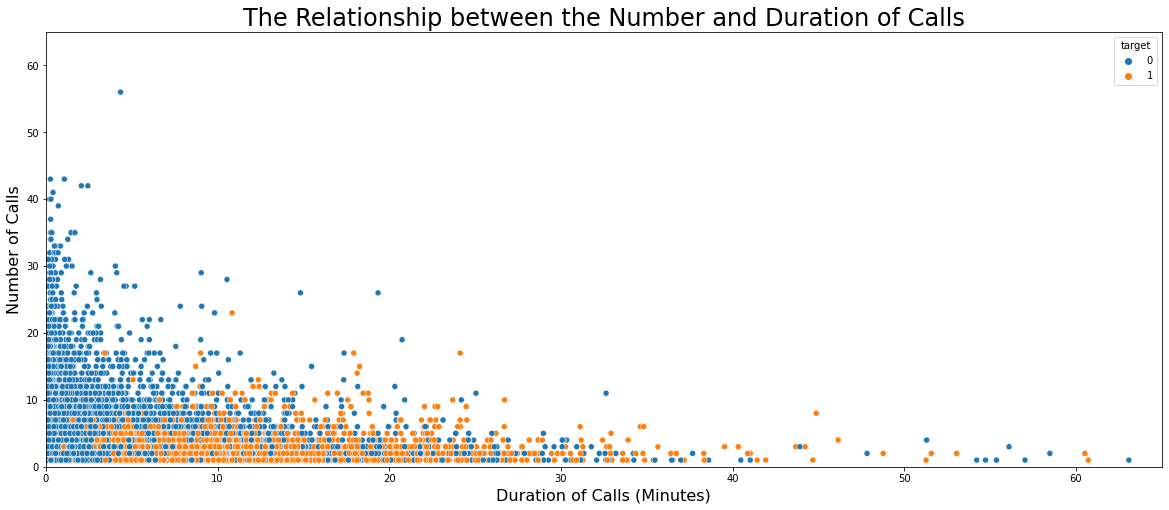

In [ ]:
plt.figure(figsize = (20, 8))
duration_campaign = sns.scatterplot(x='duration', y='campaign',data = df,
                     hue = 'target')

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls', fontsize = 16)
plt.xlabel('Duration of Calls (Minutes)', fontsize = 16)
plt.title('The Relationship between the Number and Duration of Calls', fontsize = 24)
# Annotation
plt.show()

### **Cleaning Datas As Per Duration Columns**
##### **Dropping rows where call duration was less than 10 seconds**

In [ ]:
#[df.duration < 10/60]
df[df.duration < 10/60].shape

(284, 22)

In [ ]:
# Dropped 290 rows
df = df.drop(df[df.duration < 10/60].index, axis = 0, inplace = False)
df.shape

(40061, 22)

# **EDA**

##**Univariate and Bivariate Analysis**

### **Target Variable**

**The first thing we explore is the target variable, which is a binary variable measuring the campaign outcome, representing whether a client has subscribed to a long-term deposit or not during our campaign.**

In [ ]:
ratio = df.target.value_counts()
ratio_df = pd.DataFrame([np.array(ratio.index), np.array(ratio.values)]).T
ratio_df.columns = ['Outcome', 'Number of People']
ratio_df['Outcome'] = ratio_df['Outcome'].apply(lambda x:'Yes' if x==1 else 'No')


fig = px.pie(ratio_df, values='Number of People', names='Outcome', color_discrete_sequence=px.colors.cyclical.HSV, hole = 0.3)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text="Campaign Outcome",title_x=0.48)
fig.show()


**There are more than 40,000 observations in our data set, and only 11.4% of them have positive
outcomes, which means that we have a significantly unbalanced data set.**

**Bining Age**

In [ ]:
# Putting Age into Bins
df.loc[df["age"] < 30,  'age'] = 20
df.loc[(df["age"] >= 30) & (df["age"] <= 39), 'age'] = 30
df.loc[(df["age"] >= 40) & (df["age"] <= 49), 'age'] = 40
df.loc[(df["age"] >= 50) & (df["age"] <= 59), 'age'] = 50
df.loc[df["age"] >= 60, 'age'] = 60

**1. Age** 


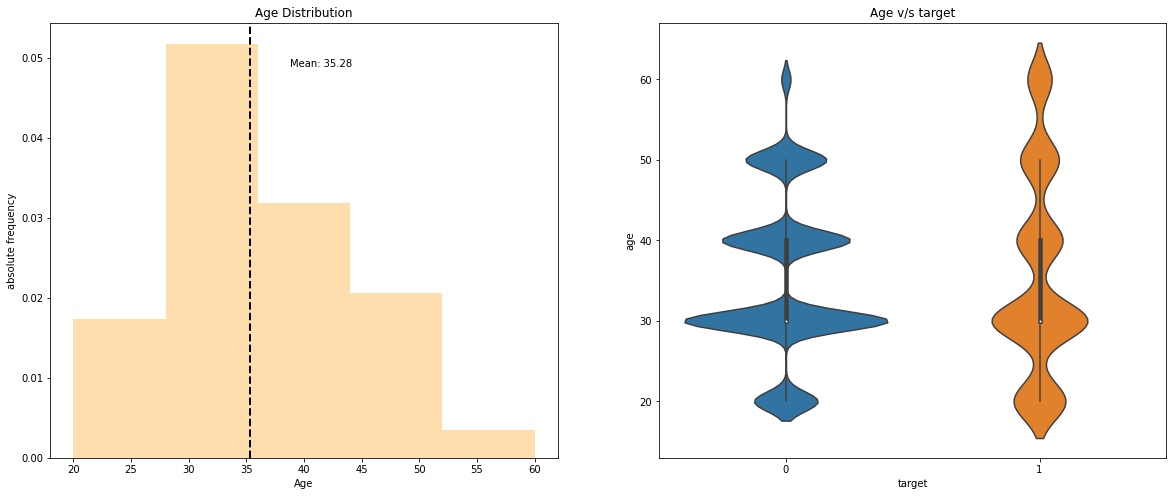

In [ ]:
plt.figure(figsize =(20 ,8))
plt.subplot(1,2,1)
n_bins=5
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('absolute frequency')
plt.hist(data = df, x = 'age', bins = n_bins,density=True,color='navajowhite');
plt.axvline(df['age'].mean(), color='k', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(df['age'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df['age'].mean()))
plt.subplot(1,2,2)
sns.violinplot(x="target",y="age",data=df)
plt.title('Age v/s target')
plt.show()

In [ ]:
print("Percentage of client between 20 and 30:")
print(df.query('20 < age <= 30').shape[0]/df.shape[0] * 100)

print("Percentage of client between 30 and 40:")
print(df.query('30 < age <= 40').shape[0]/df.shape[0] * 100)

print("Percentage of client between 40 and 60:")
print(df.query('40 < age <= 60').shape[0]/df.shape[0] * 100)

Percentage of client between 20 and 30:
41.44429744639425
Percentage of client between 30 and 40:
25.451186939916624
Percentage of client between 40 and 60:
19.228177030029205


**86.28% of the clients fall in age range of 20 - 60 years old.**

**2. Job**

In [ ]:
import plotly.express as px

fig = px.histogram(df, x="job",color='target',histnorm='percent',text_auto = True,
                color_discrete_map={
                '0' : '#071633',
                '1' : '#0DEFFF'
            },barmode="group")
fig.update_layout(title_text="Representation of various Profession in relation to target variable",title_x=0.48)

fig.show()

**The graph shows the outcome count in each job group, with the light green color denoting negative outcomes and purple color denoting the positive outcomes. There is a large
percentage of technicians, blue-collar workers and admins. However, it is students and retired
people that are most likely to say “yes” to the long-term deposit.**

**3. Marital Status**

In [ ]:
c=px.histogram(df, x="marital",color='target',
             color_discrete_sequence = ['#5F9DF7','#FF884B'],
             barmode="group", text_auto = True, histnorm='percent')
c.update_layout(title_text="Percentage of people with different marital status saying yes or no to term-deposit",title_x=0.48)

**Majority of the people have marital status as married or single.People who are married have subscribed for deposits more than people with any other marital status, they are also the one’s who have turned down the deposits offered by the bank the most.**

**4. Education**

In [ ]:
d=px.histogram(df, x="education",color='target',
             color_discrete_sequence = ['#00ADB5','#393E46'],
             barmode="group", text_auto = True, histnorm='percent')
d.update_layout(title_text="People with varied educational background saying yes or no to term-deposit",title_x=0.48)

**In terms of education, although most people in our data set have above-high-school education, the
groups that are most likely to respond positively are the least(basic.4y,high-school) and the most educated(university degree, professional course) as seen in the graph.Therefore as the level of education goes up, the greater the tendency to make the deposit.**

5. **Default**

**Default is a peculiar feature that captures whether people previously had defaulted on credit, and
it is a highly sensitive piece of information. As presented in the figure below, the majority of clients
declare no default record, however large instances are “unknown.”
Given the private nature of this
feature, we believe there are hidden stories open for interpretations behind the “unknown” values
and they might influence people’s financial decisions.**

In [ ]:
e=px.histogram(df, x="default",color='target',
             color_discrete_sequence = ['#A084CA','#3D8361'],
             barmode="group", text_auto = True, histnorm='percent')
e.update_layout(title_text="People with or without default saying yes or no to term-deposit",title_x=0.48)

**A vast majority, nearly 100%, of the clients that are contacted have not defaulted on a debt before. This seems like great news but begs the question of whether these individuals have never defaulted because they have successfully repaid all of their loans, or if they never took out a loan and, as a result, were never given the chance to default in the first place.**

6. **Loan**

Text(0.5, 1.0, 'Loan Distribution with Deposit')

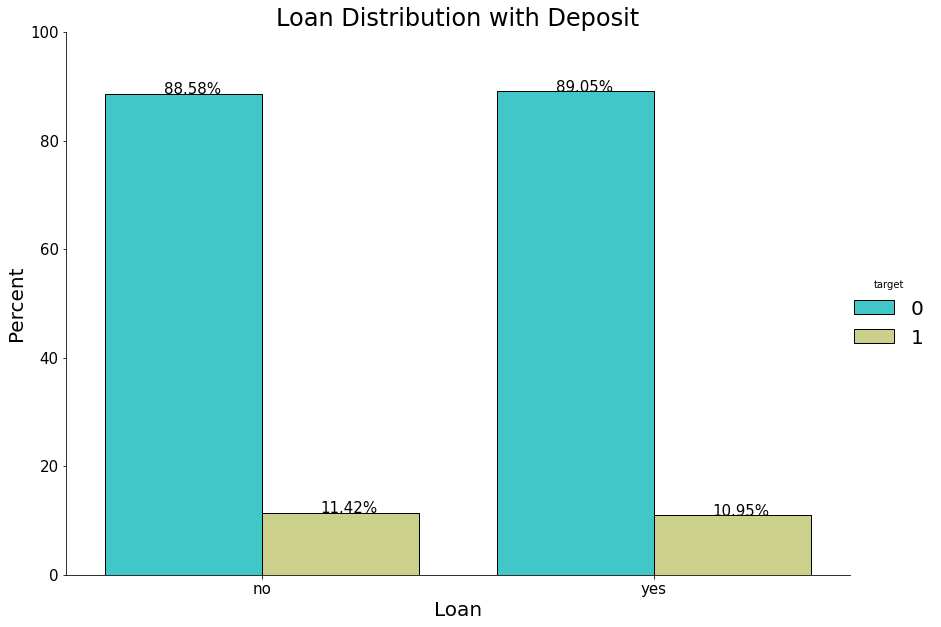

In [ ]:
d_ratio = df['loan'].value_counts()

x,y = 'loan', 'target'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue='target',kind='bar',palette='rainbow',edgecolor='black',data=df1, height=8.27, aspect=11.7/8.27)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0.15
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt, fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Loan",fontsize = 20)
plt.ylabel("Percent",fontsize = 20)
plt.rcParams['legend.fontsize'] = 20
plt.title('Loan Distribution with Deposit', fontsize = 24)

**People who do not have a loan are more likely to say yes than the people who do.**

7. **Housing**

<Figure size 720x360 with 0 Axes>

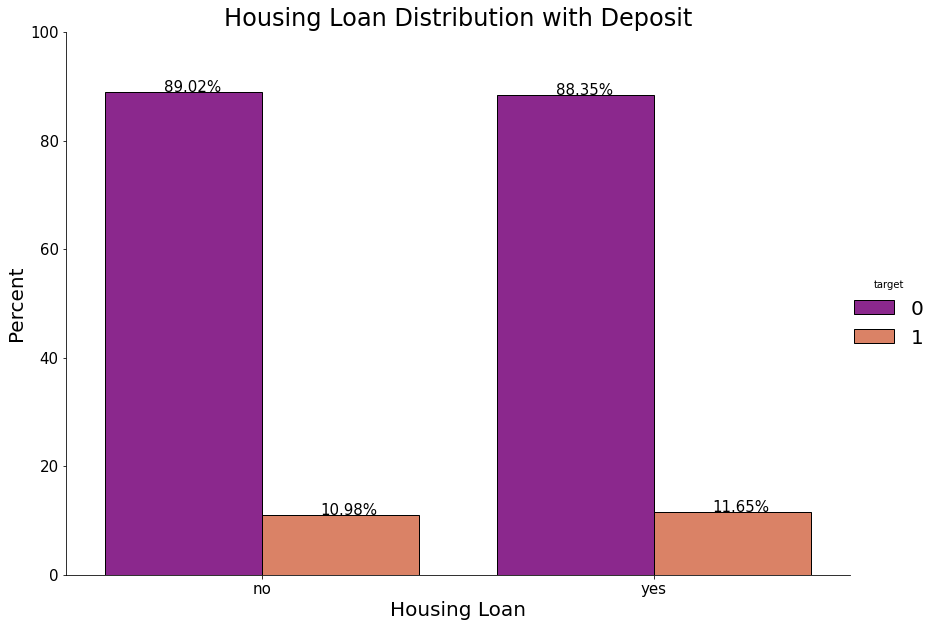

In [ ]:
plt.figure(figsize =(10,5))

x,y = 'housing', 'target'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue='target',kind='bar',palette ='plasma',edgecolor='black',data=df1, height=8.27, aspect=11.7/8.27)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0.15
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt, fontsize = 15)
plt.title('Housing Loan Distribution with Deposit', fontsize = 24)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Housing Loan",fontsize = 20)
plt.ylabel("Percent",fontsize = 20)
plt.rcParams['legend.fontsize'] = 20
plt.show();

8. **Contact**

<Figure size 720x360 with 0 Axes>

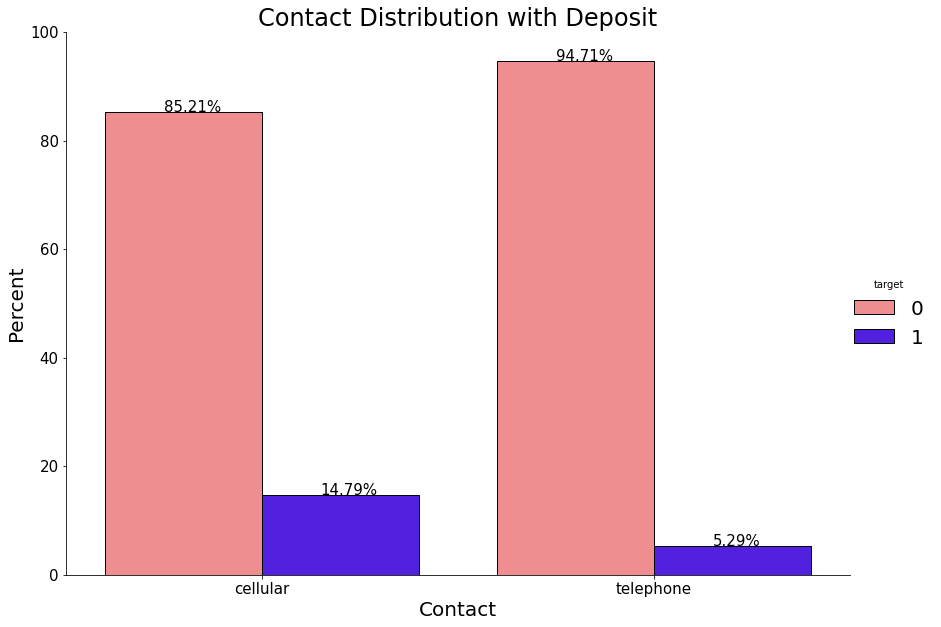

In [ ]:
plt.figure(figsize =(10,5))
d_ratio = df['contact'].value_counts()

x,y = 'contact', 'target'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue='target',kind='bar',edgecolor='black',palette ='gnuplot2_r',data=df1, height=8.27, aspect=11.7/8.27)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0.15
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt, fontsize = 15)
plt.title('Contact Distribution with Deposit', fontsize = 24)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Contact",fontsize = 20)
plt.ylabel("Percent",fontsize = 20)
plt.rcParams['legend.fontsize'] = 20
plt.show();

**We see a robust positive outcome rate for cellular phone usage.**

9. **Month distribution**

In [ ]:
 a=px.histogram(df, y="month",color='target',
             color_discrete_sequence = ['#0B409C','#A73489'],barmode="group", histnorm = 'percent', text_auto = True)
a.update_layout(title_text="Distribution of the last contacted month with deposit",title_x=0.48)

**Campaigns made in the month of 'may' are more likely to result in failure;
Campaigns made in the months of 'sep', 'mar' and 'abr' are more likely to be successful**

**10. Day of week: Last contact day of the week (Categorical)**

In [ ]:
b=px.histogram(df, x="day_of_week",color='target',
             color_discrete_sequence = ['#6A5495','#8BDB81'],
              histnorm = 'percent', text_auto = True)
b.update_layout(title_text="Distribution of last contacted day of the week with target",title_x=0.48)

**Thursday is the most busy day while Friday is the least busy day of the week.**

**As we can see clearly from the above plot that, all the days have the similar distribution for both the classes. 17–18% of the customers on any given day refuse to subscribe to a term deposit, and similarly for the customers who agree to subscribe.**

**11. Duration: Last contact duration, in minutes (numeric).**

**Important note: This attribute highly affects the output target**

In [ ]:
fig = px.histogram(df, x="duration", color="target", 
                   facet_col="target",
                   title="Duration vs Target")
fig.show()

**The duration of calls averages between 3 and 10 minutes.**

12. **Campaign: Number of contacts performed during this campaign and for this client (numeric, includes last contact)**

In [ ]:
# sns.regplot(x=df["campaign"], y=df["target"], order=1, data=df, truncate=True)

fig = px.scatter(
    df, x='campaign', y='target', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue')
fig.show()

**Above plot shows that any campaign after 20 is useless. Hence no customer must be approached more than 20 times.**

**13. Previous: number of contacts performed before this campaign and for this client (numeric)**

Text(0.5, 1.0, 'Previous values for target variable y')

<Figure size 1440x576 with 0 Axes>

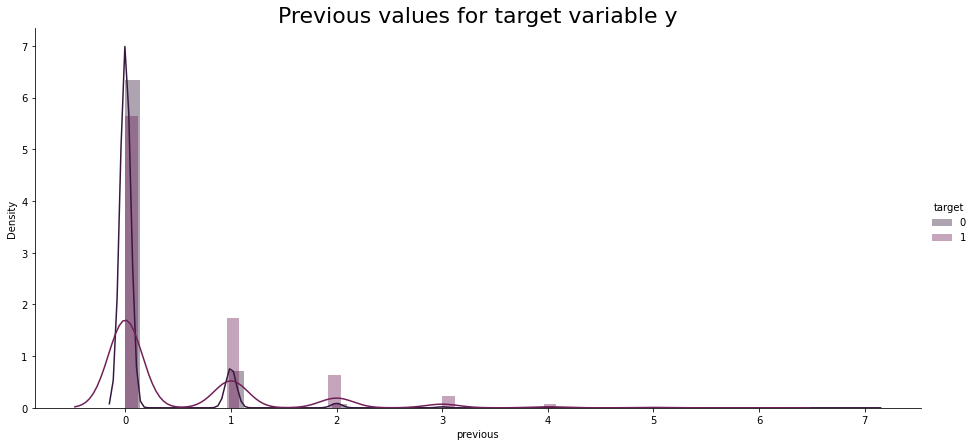

In [ ]:
plt.figure(figsize =(20 ,8))
sns.FacetGrid(df, hue='target',  height=6, aspect=13/6, palette=sns.color_palette("rocket")).map(sns.distplot, 'previous').add_legend()
plt.title('Previous values for target variable y', fontsize = 22)

**It looks like, during the campaign, most of the clients are new. Similarly, most of the subscribers obtained during the campaign have not been contacted before. 85% of subscribers have been contacted twice or less before the current campaign. It seems like if a client has not subscribed in the past 3 campaigns, including the current one, they are more likely to not subscribe during consecutive campaigns.**

15. **poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')**

In [ ]:
px.histogram(df, x="poutcome",color='target',histnorm = 'percent',barmode="group",
             color_discrete_sequence = ['#EAE509','#5BB318'],text_auto = True)

For most of the customers, the previous marketing campaign outcome does not exists. It means that most of the customers are new customers who have not been contacted earlier. Also one thing to note here that, for the customers who had a successful outcome from the previous campaign, majority of those customers **did** subscribe for a term deposit. **Therefore, a success in the previous campaign indicates that these people are very likely to buy a product once again.**

**nr.employed: number of employees - quarterly indicator (numeric)**

Text(0.5, 1.0, 'Number of employees ')

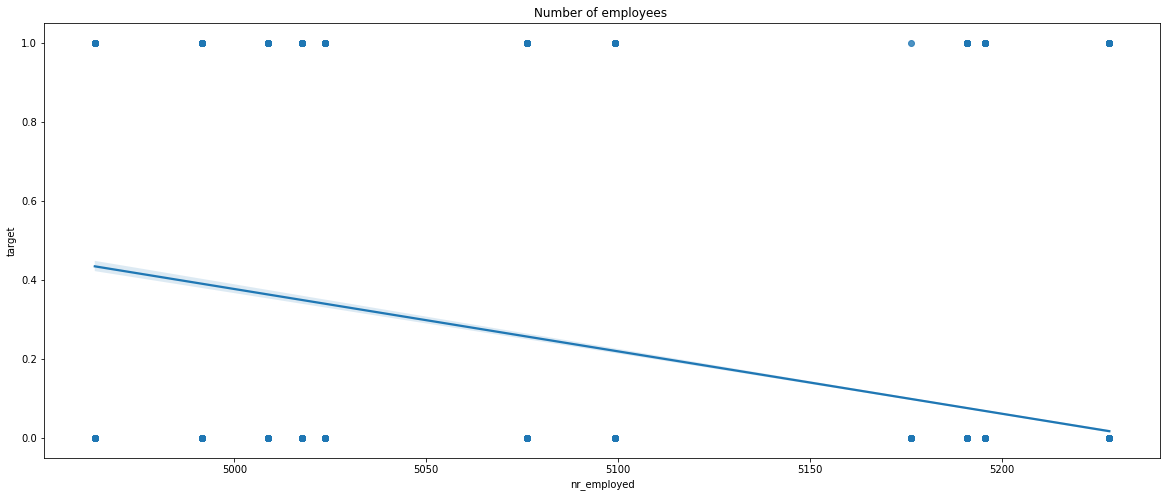

In [ ]:
plt.figure(figsize =(20,8))

sns.regplot(x=df["nr_employed"], y=df["target"], order=1, data=df, truncate=True)
plt.title('Number of employees ')

**euribor 3 month rate, daily indicator.**: The euribor denotes the basic rate of interest used in lending between banks on the European Union interbank market and also used as a reference for setting the interest rate on other loans.

**consumer confidence index - monthly indicator**: provides an indication of future developments of households’ consumption and saving, based upon answers regarding their expected financial situation, their sentiment about the general economic situation, unemployment and capability of savings.

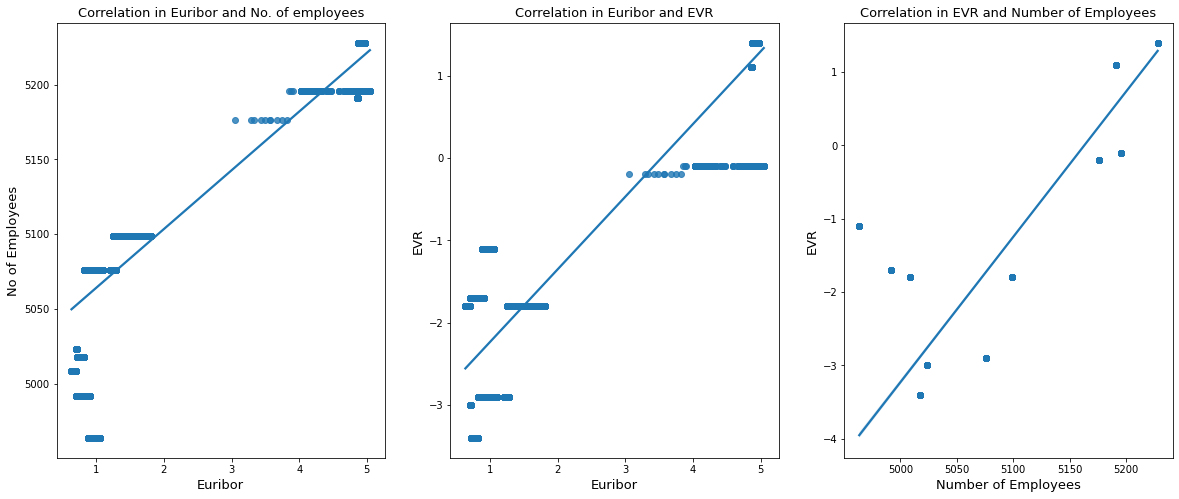

In [ ]:
plt.figure(figsize = [20, 8])
font = {'fontsize':'13', 'family': 'sans'}

# left plot: euribor vs no_emp
plt.subplot(1, 3, 1)
sns.regplot(data =df, x = 'euribor3m', y = 'nr_employed')
plt.xlabel('Euribor', fontdict = {'fontsize':'13', 'family': 'sans'})
plt.ylabel('No of Employees', fontdict = {'fontsize':'13', 'family': 'sans'});
plt.title('Correlation in Euribor and No. of employees', fontdict = font);

# middle plot: euribor vs EVR
plt.subplot(1, 3, 2)
sns.regplot(data =df, x = 'euribor3m', y = 'emp_var_rate')
plt.xlabel('Euribor', fontdict = {'fontsize':'13', 'family': 'sans'})
plt.ylabel('EVR', fontdict = {'fontsize':'13', 'family': 'sans'});
plt.title('Correlation in Euribor and EVR', fontdict = font);

# right plot: no_emp vs EVR
plt.subplot(1, 3, 3)
sns.regplot(data =df, x = 'nr_employed', y = 'emp_var_rate')
plt.xlabel('Number of Employees', fontdict = {'fontsize':'13', 'family': 'sans'})
plt.ylabel('EVR', fontdict = {'fontsize':'13', 'family': 'sans'});
plt.title('Correlation in EVR and Number of Employees', fontdict = font);

**It seems conclusive that there is a strong correlation in EVR, euribor and no_emp with each other.Also, when euribor is less than 2, EVR is always less than -1.Therefore they are postively correlated.Similarly, when euribor is more than 3, EVR is always more than 0.5**

### **Multi-variate Analysis**

In [ ]:
num_vars = ['emp_var_rate', 'cons_conf_idx', 'cons_price_idx', 'euribor3m', 'nr_employed', 'target']

fig = px.imshow(round(df[num_vars].corr(), 2),text_auto=True,  aspect="auto", color_continuous_scale='RdBu')

fig.update_layout(title_text="Correlation Maps Between Numerical Features",title_x=0.48)
fig.layout.height = 1000
fig.layout.width = 1000
fig.show()

**From the above heatmap we can see that there are some numerical features which share a high correlation between them, e.g nr.employed and euribor3m these features share a correlation value of 0.95, and euribor3m and emp.var.rate share a correlation of 0.97, which is very high compared to the other features that we see in the heatmap.**

**We saw that when euribor-3-month rate is less than 2, EVR is always less than -1**

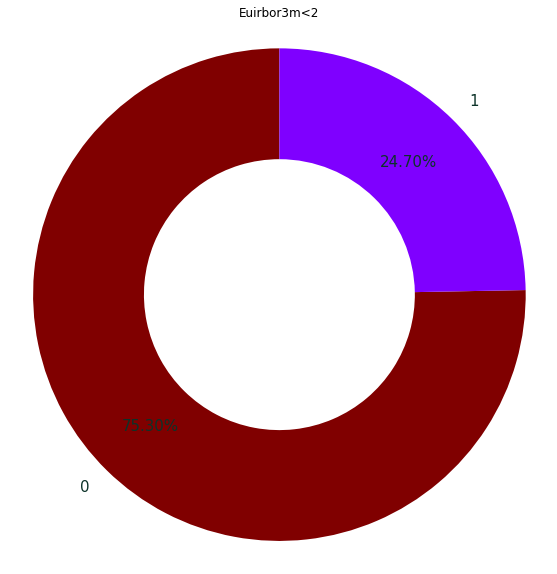

In [ ]:
#Selecting records from the whole dataset based on the criteria
df_sub = df.query('euribor3m < 2')
ratio = df_sub.target.value_counts()
plt.figure(figsize = (15,10))
plt.pie(ratio, labels = ratio.index, autopct='%1.2f%%', pctdistance=0.75, colors = ['#800000', '#7f00ff'],
        startangle = 90, wedgeprops = {'width' : 0.45}, textprops={'fontsize': 15, 'color' :'#0c3329'})
plt.title("Euirbor3m<2")
plt.axis('square');

When EVR < -1 and euribor < 2,  
**24.70%** of people agree to opening term deposit. That's a very large ratio and can certainly help to approach customers.

We had also noticed earlier that lesser number of calls are placed when euribor < 2. 

In [ ]:
# number of records where euribor is less than 2

df.query('euribor3m < 2').shape[0]


13087

In [ ]:
# number of records where euribor is equal to or more than 2

df.query('euribor3m>= 2').shape[0]

26974

<Figure size 1440x576 with 0 Axes>

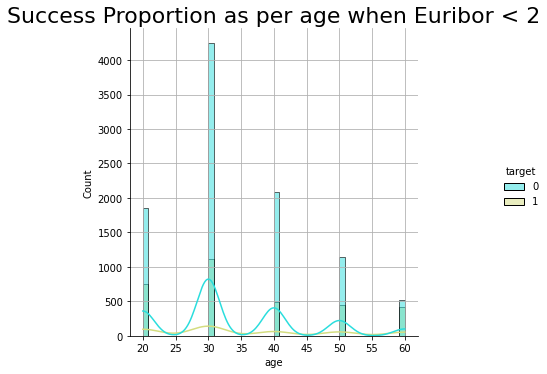

In [ ]:
plt.figure(figsize = (20,8))
sns.displot(data=df_sub,x = 'age',kde=True, hue='target', palette='rainbow')
plt.title('Success Proportion as per age when Euribor < 2', fontsize = 22)
plt.grid()

**We see that clients upto 60 years of age, open considerably higher percentage of term deposits when euribor 3 month rate is less than 2. However, clients with more than 60 years of age, follow almost the same trend as in overall data.**

In [ ]:
df.query('age <= 60')['target'].mean()

0.1134769476548264

In [ ]:
df_sub.query('age <= 60')['target'].mean()

0.2470390463819057

**24.697% of young people(upto age 60) open term deposit when euribor < 2. This is more than the average of 11.351% over the whole dataset.**

## **Conclusion:**
1. We noticed that when euribor3 month rate is less than 2, success rate of the campaign increases to 24.7%. This is significant increase from 11.3% success rate in overall data.

2. Number of calls placed when euribor is less than 2 are half of those place when euribor is 2 or more. This is a very significant difference in numbers and highlights an area where we can work upon to get more positive results.

3. Statistically, 24.697% of young people(upto age 60) open term deposits when euribor < 2. This is more than the average of 11.35% over the whole dataset for the same age group. Therefore, we can conclude that clients upto 60 years of age open considerably higher percentage of accounts when euribor 3 month rate is less than 2. However, clients with more than 60 years of age, follow almost the same trend as in overall data.

In [ ]:
from matplotlib.gridspec import GridSpec
cols= ['#00876c','#85b96f','#f7e382','#f19452','#d43d51']

Text(0.05, -0.05, 'Observation:\n Loan has bigger impact on the target, people who have loans have less term deposits.\n people who said yes even with loan are between the age of 30 to 50. people who said yes without loan is from 30 to 60 year. so people getting older preferes deposits than the loan')

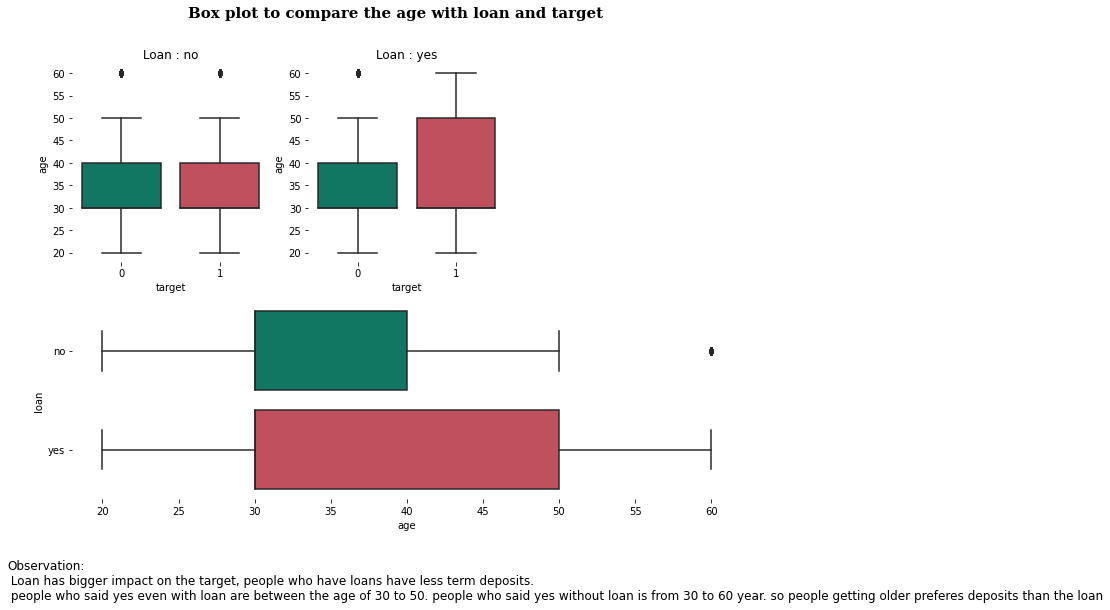

In [ ]:
fig = plt.figure(figsize=(12,8))
gs = GridSpec(ncols=3, nrows=2, figure=fig)
plt.suptitle("Box plot to compare the age with loan and target", family='Serif', weight='bold', size=15)
for i,c in enumerate(df['loan'].unique()):
    ax=plt.subplot(gs[0,i])
    ax=sns.boxplot(y=df[df['loan']==c]['age'], x=df['target'],palette=['#00876c','#d43d51']);
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_title("Loan : {}".format(c))

ax=plt.subplot(gs[1,:])
ax=sns.boxplot(data=df[df['target']==1],y='loan',x='age', palette=['#00876c','#d43d51','#f7e382'])
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.figtext(0.05,-0.05,"Observation:\n Loan has bigger impact on the target, people who have loans have less term deposits.\n people who said yes even with loan are between the age of 30 to 50. people who said yes without loan is from 30 to 60 year. so people getting older preferes deposits than the loan",
           family='San', size=12, ha='left')

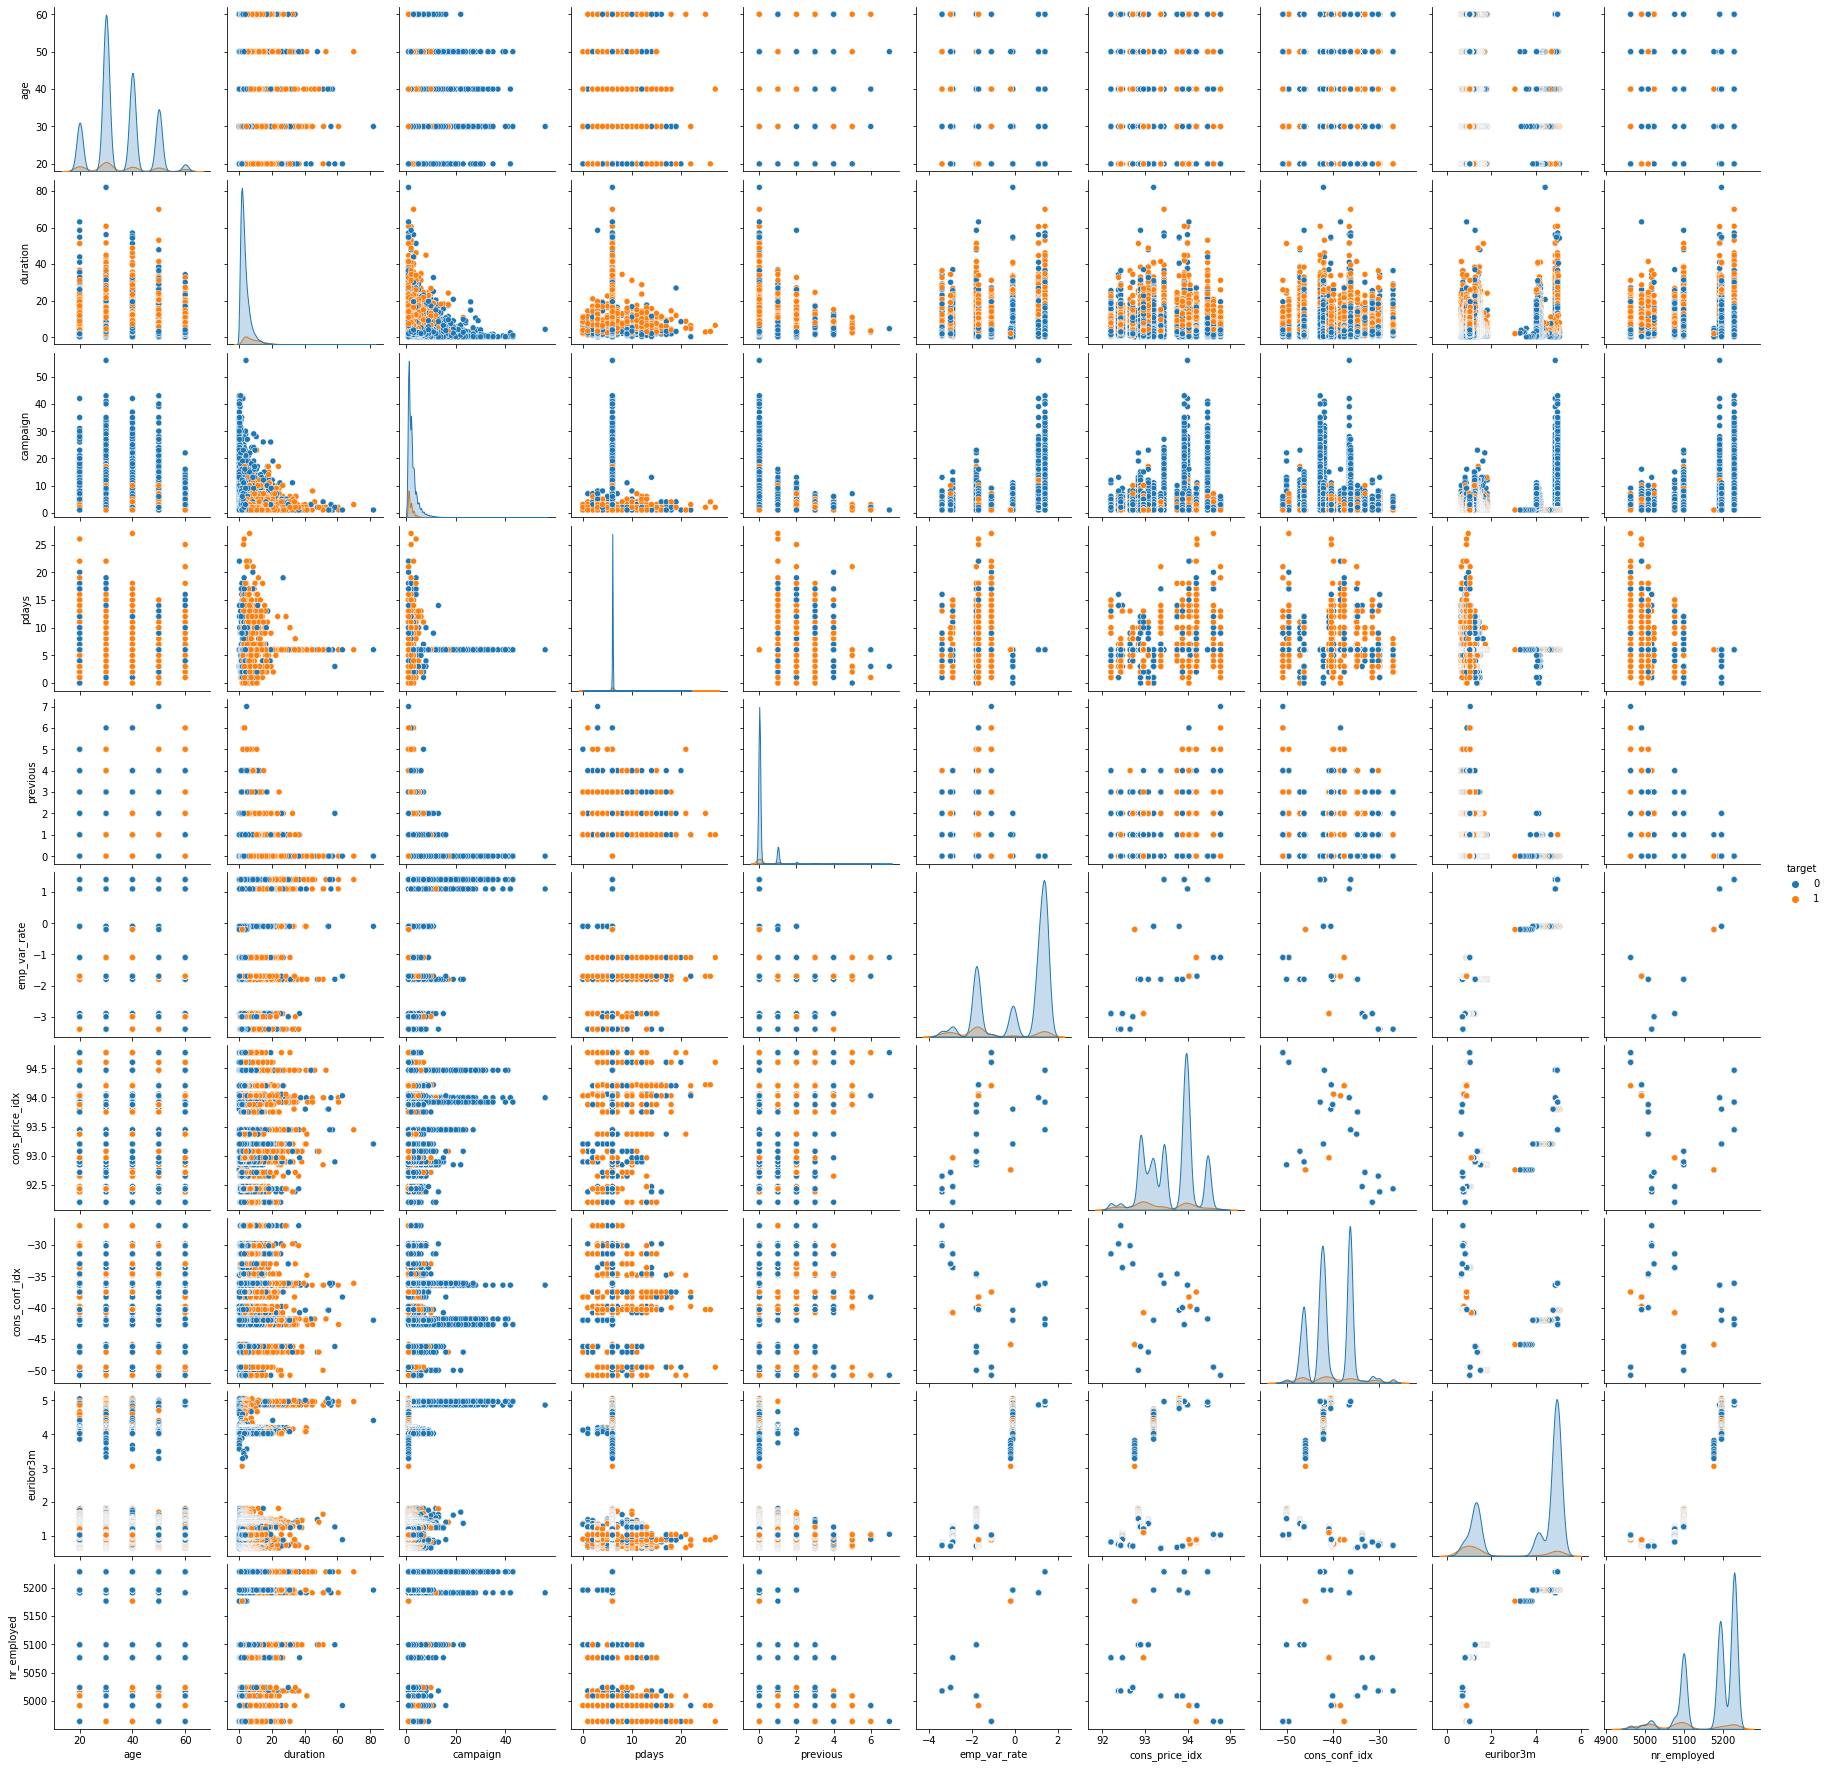

In [ ]:
sns.pairplot(data=df,hue='target')
plt.show()

## **Conclusions from Data Cleaning and Exploratory Data Analysis**

### ->Target relatively Old Age people.

### ->Prioritize those customers to who were the part of the previous campaigns.

### ->According to the plot for both logistic regression and random forest, we can tell that the most influential variables are duration, nr.employed, euribor3m, and emp.var.rate.

### ->Based on signs of coefficients of variables in logistic regression, “duration” has a positive effect on people saying “yes”. This is because the longer the conversations on the phone, the higher the interest the customer will show to the term deposit.

### ->“nr.employed”, which is the number of employees in the bank, has a positive effect for turning people to subscribe to the term deposit. This can be due to the fact that the more employees the bank has, the more influential and prestigious this bank is.

### ->“euribor3m” is another important variable, which denotes the Euribor 3 month rate.

### ->This indicator is based on the average interbank interest rates in Eurozone. It also has a positive effect since

### ->the lower the interest rate the more willingly customer will spend their money on financial tools.

### ->Employment variation rate (emp.var.rate) has a negative influence, which means the change of the

### ->employment rate will make customers less likely to subscribe to a term deposit.

### ->This makes sense because the employment rate is an indicator of the macroeconomy. A stable employment rate denotes a stable economic environment in which people are more confident to make their investment.

# **Feature Engineering**
### **Features Encoding and Preprocessing**

In [ ]:
df1 = df.copy()

categorical_cols = list(df.select_dtypes(include = ['object', 'category']))
for col in categorical_cols:
  print(col, " : ", df1[col].dtype)

job  :  object
marital  :  object
education  :  object
default  :  object
housing  :  object
loan  :  object
contact  :  object
month  :  object
day_of_week  :  object
poutcome  :  object
age_bins  :  category


In [ ]:
# Converting these columns into categorical variables
for col in categorical_cols:
  df1[col] = df1[col].astype('category')

In [ ]:
for col in categorical_cols:
  print(col, " : ", df1[col].dtype)

job  :  category
marital  :  category
education  :  category
default  :  category
housing  :  category
loan  :  category
contact  :  category
month  :  category
day_of_week  :  category
poutcome  :  category
age_bins  :  category


In [ ]:
# .cat.codes will encode as Label Encoding
for col in categorical_cols:
  df1[col] = df1[col].cat.codes

In [ ]:
# After Label Encoding
df1[categorical_cols].head()

job  marital  education  default  housing  loan  contact  month  \
0    3        1          0        0        0     0        1      6   
1    7        1          3        1        0     0        1      6   
2    7        1          3        0        1     0        1      6   
3    0        1          1        0        0     0        1      6   
4    7        1          3        0        0     1        1      6   

   day_of_week  poutcome  age_bins  
0            1         1         1  
1            1         1         1  
2            1         1         1  
3            1         1         1  
4            1         1         1

In [ ]:
# Splitting data into train and test
y = df1['target']
x_train, x_test, y_train, y_test = train_test_split(df1.drop(['target'], axis=1), y, test_size=0.20, random_state=42)

In [ ]:
print('Train data shape {} {}'.format(x_train.shape, y_train.shape))
print('Test data shape {} {}'.format(x_test.shape, y_test.shape))

Train data shape (32048, 21) (32048,)
Test data shape (8013, 21) (8013,)


### **Importance of Features**

In [ ]:
clf = DecisionTreeClassifier(class_weight='balanced', min_weight_fraction_leaf = 0.01)

clf.fit(x_train, y_train)
importances = clf.feature_importances_
feature_names = df1.drop('target', axis=1).columns
indices = np.argsort(importances)[::-1]

importance_dict = {"Features": feature_names[indices], "Importances":[round(value*100, 2) for value in importances[indices]]}
df_importance = pd.DataFrame(importance_dict)

fig = px.bar(df_importance, y='Importances', x='Features', text=df_importance['Importances'].apply(lambda x: '{0:1.2f}%'.format(x)))
fig.update_layout(title_text="Contribution of Features in Classification",title_x=0.48)
fig.update_traces(texttemplate='%{text:"." + text + "%"}', textposition='outside')

fig.show()


### **Important Features Contributing Largely for Outcomes as Per Decision Tree Classifier::**

duration

nr_employed

cons_conf_idx

cons_price_idx

euribor3m

day_of_week

emp_var_rate

pcoutcome

age

contact

education

campaign

previous

job

In [ ]:
important_features =['age', 'job', 'education', 'contact', 'day_of_week', 'duration', 'campaign', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx','cons_conf_idx', 'euribor3m', 'nr_employed']

### **Correlation Maps**

In [ ]:
fig = px.imshow(round(x_train[important_features].corr(), 2),text_auto=True,  aspect="auto", color_continuous_scale='RdBu')

fig.update_layout(title_text="Correlation Between Features",title_x=0.48)
fig.layout.height = 1200
fig.layout.width = 1200
fig.show()

#### **From above correlation maps, we can observe that some of the features are highly correlated with not only another single feature but some are multicollinear**

### **Variation Inflation Factor (VIF)**
#### **To Check Multicollinearity**

In [ ]:
#Import library from VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

#Remove Dependant column first and then apply VIF
calc_vif(x_train[important_features])

variables           VIF
0              age     13.714508
1              job      2.102813
2        education      4.336795
3          contact      2.696993
4      day_of_week      3.076688
5         duration      2.006469
6         campaign      1.944446
7         previous      1.764529
8         poutcome      9.276155
9     emp_var_rate     30.327150
10  cons_price_idx  31987.182271
11   cons_conf_idx    121.944651
12       euribor3m    258.810233
13     nr_employed  36474.736328

#### **From above dataframe, we can observe that we're right about multicollinearity.**

### **Selecting Features**
##### **Since age_bins has low VIF, so we will remove age and keep age_bins**

In [ ]:
important_features =['age_bins', 'job', 'education', 'contact', 'day_of_week', 'duration', 'campaign', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx','cons_conf_idx', 'euribor3m', 'nr_employed']

#### **First Removing On the Basis of Correlation**

In [ ]:
cor_matrix = x_train.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.89)]
print(to_drop)

['euribor3m', 'nr_employed']


In [ ]:
for col in to_drop:
  important_features.remove(col)

important_features

['age_bins',
 'job',
 'education',
 'contact',
 'day_of_week',
 'duration',
 'campaign',
 'previous',
 'poutcome',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx']

In [ ]:
calc_vif(x_train[important_features])

variables         VIF
0         age_bins    5.119370
1              job    2.102811
2        education    4.276547
3          contact    2.000106
4      day_of_week    3.073386
5         duration    2.000374
6         campaign    1.935169
7         previous    1.501361
8         poutcome    8.799109
9     emp_var_rate    1.434647
10  cons_price_idx  134.952121
11   cons_conf_idx   90.479639

**Now only two features have VIF more than 10, we need to remove one for that, we will check correlation of both features with target and one having greater correlation will be kept and another removed**

In [ ]:
print("Correlation Between Consumer Price Index and Target")
print(x_train['cons_price_idx'].corr(y_train))
print("Correlation Between Consumer Confidence Index and Target")
print(x_train['cons_conf_idx'].corr(y_train))

Correlation Between Consumer Price Index and Target
-0.1361493720326124
Correlation Between Consumer Confidence Index and Target
0.0523337063584518


**Hence we will remove consumer confidence index feature**

In [ ]:
important_features.remove('cons_conf_idx')

In [ ]:
# Let's recheck VIF
print(calc_vif(x_train[important_features]))

         variables        VIF
0         age_bins   5.055619
1              job   2.100139
2        education   4.224864
3          contact   1.894929
4      day_of_week   3.067025
5         duration   2.000303
6         campaign   1.931702
7         previous   1.488048
8         poutcome   8.565662
9     emp_var_rate   1.401656
10  cons_price_idx  22.083383


In [ ]:
important_features

['age_bins',
 'job',
 'education',
 'contact',
 'day_of_week',
 'duration',
 'campaign',
 'previous',
 'poutcome',
 'emp_var_rate',
 'cons_price_idx']

In [ ]:
# Now cons_price_idx has VIF greater than 10
cross_tab(x_train, 'cons_price_idx', 'poutcome')

1      2       0
cons_price_idx                     
92.201           345   96.0   150.0
92.379           124   43.0    39.0
92.431           227   48.0    84.0
92.469           102   10.0    23.0
92.649           124   72.0    84.0
92.713            75   32.0    29.0
92.756             7    0.0     1.0
92.843           207    3.0    13.0
92.893          3040  120.0  1350.0
92.963           406   55.0    95.0
93.075          1403   55.0   463.0
93.200          2297   30.0   564.0
93.369            84   57.0    56.0
93.444          4010    0.0     0.0
93.749            60   38.0    31.0
93.798            50    0.0     1.0
93.876            60   58.0    52.0
93.918          5213    0.0     0.0
93.994          6002    0.0     0.0
94.027            73   56.0    49.0
94.055            81   57.0    38.0
94.199            96   66.0    60.0
94.215            90   75.0    76.0
94.465          3383    0.0     0.0
94.601            55   55.0    46.0
94.767            43   27.0    34.0

**We couldn't find any method to reduc VIF of cons_price_idx as this feature is very important, we can't drop it and neither we can combine it with another feature.**

### **Deleting Unimportant Features from Dataset for Machine Learning Models**

In [ ]:
important_features.append('target')
important_features

['age_bins',
 'job',
 'education',
 'contact',
 'day_of_week',
 'duration',
 'campaign',
 'previous',
 'poutcome',
 'emp_var_rate',
 'cons_price_idx',
 'target']

In [ ]:
df = df[important_features]
df.head(10)

age_bins         job            education    contact day_of_week  duration  \
0     Adult   housemaid             basic.4y  telephone         mon      4.35   
1     Adult    services          high.school  telephone         mon      2.48   
2     Adult    services          high.school  telephone         mon      3.77   
3     Adult      admin.             basic.6y  telephone         mon      2.52   
4     Adult    services          high.school  telephone         mon      5.12   
5     Adult    services             basic.9y  telephone         mon      3.30   
6     Adult      admin.  professional.course  telephone         mon      2.32   
8     Young  technician  professional.course  telephone         mon      6.33   
9     Young    services          high.school  telephone         mon      0.83   
11    Young    services          high.school  telephone         mon      3.70   

    campaign  previous     poutcome  emp_var_rate  cons_price_idx  target  
0          1         0  nonexistent           1.1          93.994       0  
1          1         0  nonexistent           1.1          93.994       0  
2          1         0  nonexistent           1.1          93.994       0  
3          1         0  nonexistent           1.1          93.994       0  
4          1         0  nonexistent           1.1          93.994       0  
5          1         0  nonexistent           1.1          93.994       0  
6          1         0  nonexistent           1.1          93.994       0  
8          1         0  nonexistent           1.1          93.994       0  
9          1         0  nonexistent           1.1          93.994       0  
11         1         0  nonexistent           1.1          93.994       0

# **Machine Learning Models and Accuracy Measures**

### **Importing Required Libraries and Modules**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score

### **Function to Generate Model Report**

In [ ]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

def generate_roc_auc_curve(X_test, y_test, lg_clf):
  # Generating ROC_AUC Curve
  y_pred_proba = lg_clf.predict_proba(X_test)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
  auc = roc_auc_score(y_test, y_pred_proba)
  plt.figure(figsize = (20, 8))
  plt.title('Logistic Regression', fontsize = 24, color = 'b')
  plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
  plt.plot([0, 1], [0, 1], linestyle='--')
  plt.xticks(fontsize = 15)
  plt.yticks(fontsize = 15)
  plt.xlabel('False Positive Rate', fontsize = 18)
  plt.ylabel('Tru Positive Rate', fontsize = 18)
  plt.legend(loc=4, fontsize = 20)
  plt.show()

# Generating confusion matrix
def confusion_matrix(y_test, y_pred_lg):
  from sklearn.metrics import confusion_matrix

  cma = confusion_matrix(y_test, y_pred_lg)
  print('Confusion matrix:\n', cma)
  df_cm = pd.DataFrame(cma, range(2), columns=range(2))
  plt.figure(figsize = (10,7))
  s = sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'],cmap='Spectral_r',linecolor = 'black');
  s.set_xlabel('Predicted Values', fontsize=16)
  s.set_ylabel('Actual Values', fontsize=16)

#### **Label Encoding**

In [ ]:
categorical_cols = list(df.select_dtypes(include = ['object', 'category']))
labelenc = LabelEncoder()
df[categorical_cols] = df[categorical_cols].apply(LabelEncoder().fit_transform)

#### ***It is important to note that duration attribute highly affects the output target. Yet, the duration is not known before a call is performed. Also, after the end of the call y is known. Thus, this input should only be included for benchmark purposes and should be discarded.***

#### **Test Train Splitting**

In [ ]:
X = df.drop('target', axis = 1)
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
y_train.to_csv("model_y.csv")

### **Logistic Regression**

In [ ]:
lg_clf=LogisticRegression()

In [ ]:
# Fitting on data
lg_clf.fit(X_train, y_train)

# Scoring the model on train data
score_lg_train=lg_clf.score(X_train, y_train)
print("Training score: %.2f " % score_lg_train)

# Scoring the model on test_data
score_lg_test=lg_clf.score(X_test, y_test)
print("Testing score: %.2f " % score_lg_test)

y_pred_lg = lg_clf.predict(X_test)
# y_prob = rf_clf.predict_proba(X_test)
# probs = y_prob[:,1]

Training score: 0.91 
Testing score: 0.90 


In [ ]:
# Generating Model Report
generate_model_report(y_test,y_pred_lg)

Accuracy =  0.9049837756884932
Precision =  0.6532988357050453
Recall =  0.36620739666424945
F1 Score =  0.4693308550185874


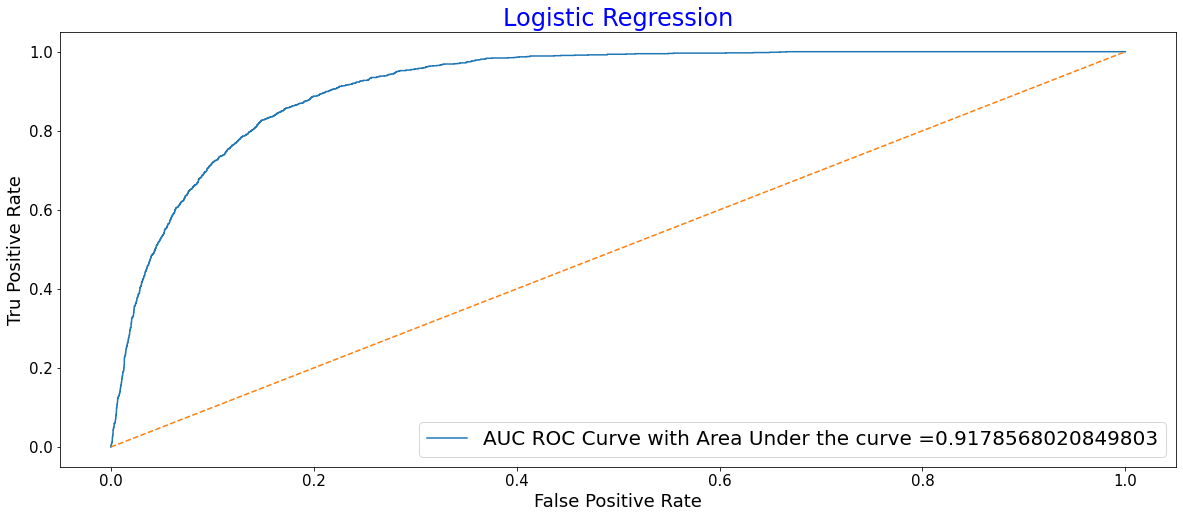

In [ ]:
generate_roc_auc_curve(X_test, y_test, lg_clf)

### **Confusion Matrix**

Confusion matrix:
 [[10372   268]
 [  874   505]]


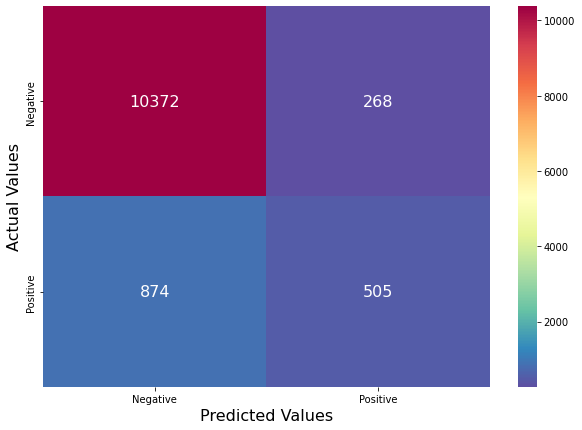

In [ ]:
confusion_matrix(y_test, y_pred_lg)

### **Random Forest Classifier**

In [ ]:
# Initialising Random Forest model
rf_clf=RandomForestClassifier(n_estimators=100,n_jobs=100,random_state=0, min_samples_leaf=100)

# Fitting on data
rf_clf.fit(X_train, y_train)

# Scoring the model on train data
score_rf=rf_clf.score(X_train, y_train)
print("Training score: %.2f " % score_rf)

# Scoring the model on test_data
score_rf=rf_clf.score(X_test, y_test)
print("Testing score: %.2f " % score_rf)

y_pred_rf = rf_clf.predict(X_test)

Training score: 0.91 
Testing score: 0.91 


In [ ]:
#Generate Model Report
generate_model_report(y_test,y_pred_rf)

Accuracy =  0.9062317996505533
Precision =  0.7241992882562278
Recall =  0.2951414068165337
F1 Score =  0.4193714580113344


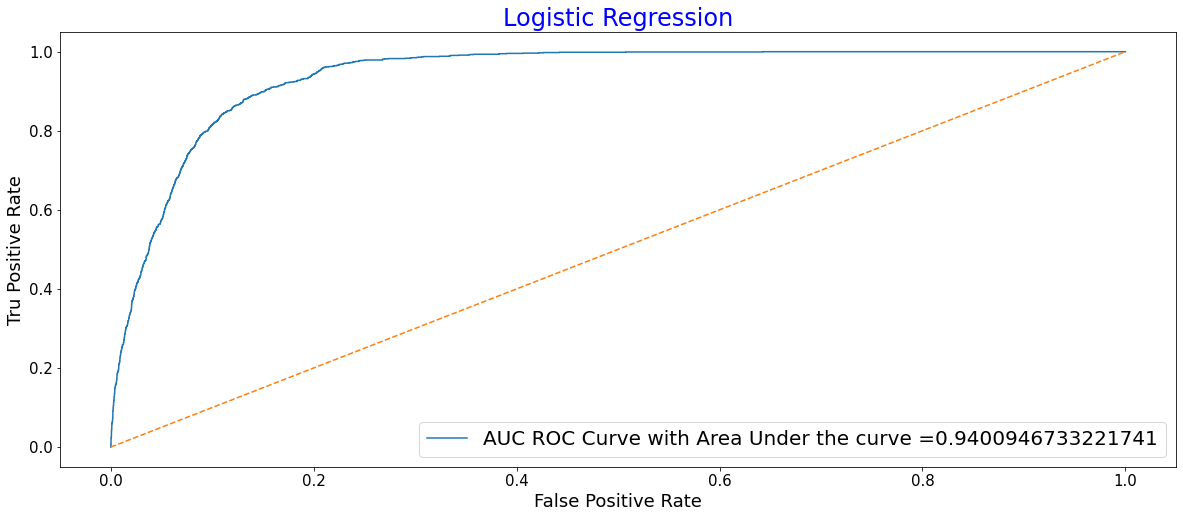

In [ ]:
generate_roc_auc_curve(X_test, y_test, rf_clf)

### **Confusion Matrix**

Confusion matrix:
 [[10485   155]
 [  972   407]]


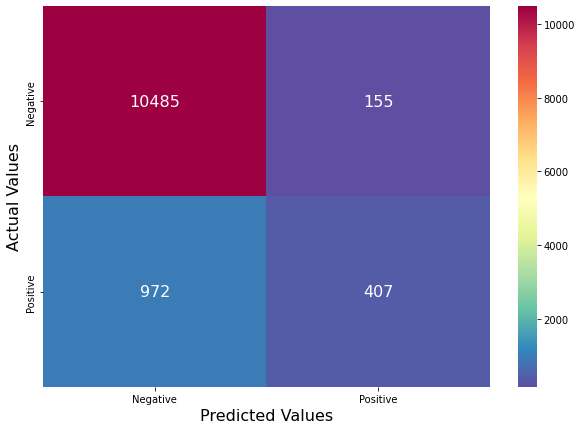

In [ ]:
confusion_matrix(y_test, y_pred_rf)

### **Hence logistic regression has Higher Accuracy than Logistic Regression**

## **For Model Deployment**

In [ ]:
model = rf_clf